In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
injuries_df = pd.read_csv("Downloads/injuries.csv")

In [3]:
injuries_df.describe()

athlete_id
count  137.000000
mean    15.605839
std      9.653068
min      1.000000
25%      6.000000
50%     18.000000
75%     24.000000
max     30.000000

In [4]:
injuries_df.head()

athlete_id        date
0           1  2016-05-11
1           1  2016-05-16
2           1  2016-07-28
3           1  2016-11-11
4           1  2016-12-16

In [5]:
injuries_df['date'] = injuries_df['date'].astype('datetime64[ns]')
injuries_df.dtypes

athlete_id             int64
date          datetime64[ns]
dtype: object

In [6]:
injury_counts = injuries_df.groupby("athlete_id").count().reset_index()
#.sort_values(by= ["date"],ascending=False)

In [7]:
injury_counts = injury_counts.rename(columns={'date':'total_injuries'})

In [8]:
injury_counts.sort_values("total_injuries", ascending = False,inplace= True)

In [9]:
injury_counts

athlete_id  total_injuries
0            1              12
23          25              12
20          22              10
2            3               9
1            2               7
16          18               7
27          29               7
18          20               6
26          28               5
19          21               5
22          24               5
3            4               5
11          12               5
25          27               4
15          17               4
6            7               4
9           10               4
10          11               3
12          14               3
13          15               3
21          23               3
28          30               3
17          19               2
5            6               2
7            8               2
24          26               2
4            5               1
8            9               1
14          16               1

## "Plotting the number of injures occured by each athlete"

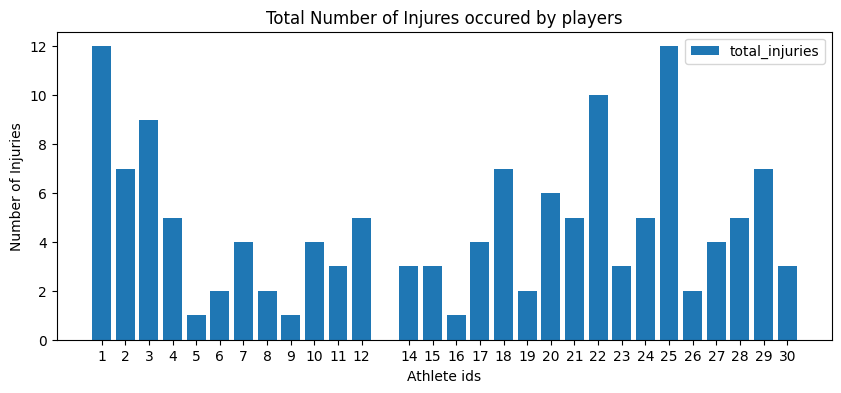

In [10]:
"""Plotting the number of injures occured by each athlete"""
rcParams['figure.figsize'] = 10, 4
plt.bar(injury_counts["athlete_id"], injury_counts["total_injuries"])
plt.xticks(injury_counts["athlete_id"])
plt.legend(['total_injuries'])
plt.title("Total Number of Injures occured by players")
plt.xlabel('Athlete ids')
plt.ylabel('Number of Injuries')
plt.show()

In [11]:
injuries_df["injury"] = "Yes"

In [12]:
injuries_df.head()

athlete_id       date injury
0           1 2016-05-11    Yes
1           1 2016-05-16    Yes
2           1 2016-07-28    Yes
3           1 2016-11-11    Yes
4           1 2016-12-16    Yes

In [13]:
workload_df = pd.read_csv("Downloads/game_workload.csv")

In [14]:
workload_df.describe()

athlete_id  game_workload
count  2400.000000    2400.000000
mean     15.649167     400.481667
std       8.735438      47.991824
min       1.000000     225.000000
25%       8.000000     368.000000
50%      16.000000     400.000000
75%      23.000000     433.250000
max      30.000000     534.000000

In [15]:
workload_df.head()

athlete_id        date  game_workload
0           1  2016-05-05            402
1           1  2016-05-08            365
2           1  2016-05-11            457
3           1  2016-05-16            405
4           1  2016-05-20            407

In [16]:
workload_df["game_workload"].max()

np.int64(534)

In [17]:
workload_df["game_workload"].min()

np.int64(225)

In [18]:
workload_df.loc[workload_df['game_workload'].idxmax()]

athlete_id               10
date             2017-03-06
game_workload           534
Name: 740, dtype: object

In [19]:
workload_df.loc[workload_df['game_workload'].idxmin()]

athlete_id               13
date             2017-06-28
game_workload           225
Name: 986, dtype: object

In [20]:
workload_df['date'] = workload_df['date'].astype('datetime64[ns]')

In [21]:
workload_df.dtypes

athlete_id                int64
date             datetime64[ns]
game_workload             int64
dtype: object

<Axes: title={'center': 'Average Workload of players'}, ylabel='athlete_id'>

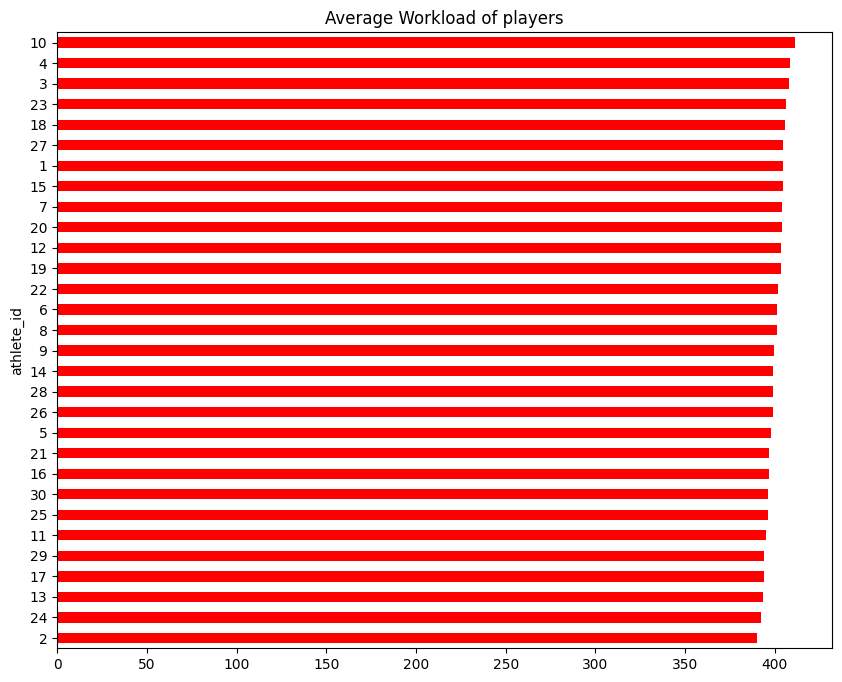

In [22]:
rcParams['figure.figsize'] =10, 8
workload_df.groupby("athlete_id")['game_workload'].mean().sort_values().plot(kind = 'barh',y= 'workload', x="athlete_id",
                     title = "Average Workload of players",color='r')

<Axes: title={'center': 'Number of Games played by each Athlete'}, ylabel='athlete_id'>

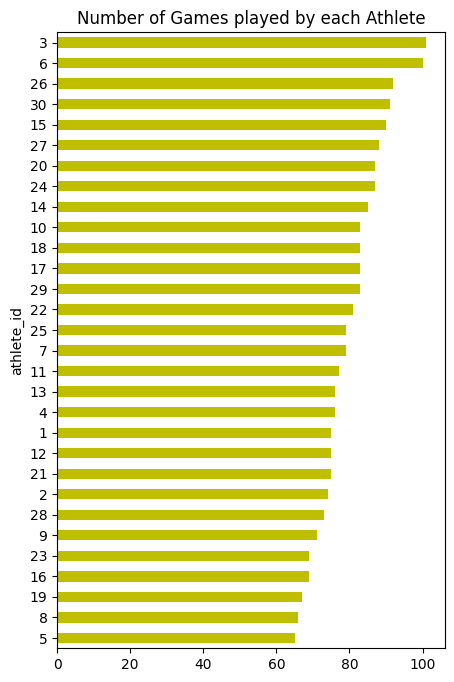

In [23]:
rcParams['figure.figsize'] = 5, 8
workload_df.groupby("athlete_id")['date'].count().sort_values().plot(kind = 'barh',y='date', x="athlete_id",
                     title = "Number of Games played by each Athlete",color='y')

In [24]:
games_data = pd.merge(workload_df,injuries_df,  how='left', left_on=['athlete_id','date'], right_on = ['athlete_id','date'])

In [25]:
games_data["injury"].fillna("No", inplace = True)
#playersData["game_workload"].fillna(0, inplace = True)
games_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_21592\1681994974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_data["injury"].fillna("No", inplace = True)


athlete_id       date  game_workload injury
0           1 2016-05-05            402     No
1           1 2016-05-08            365     No
2           1 2016-05-11            457    Yes
3           1 2016-05-16            405    Yes
4           1 2016-05-20            407     No

In [26]:
games_data['date'] = games_data['date'].astype('datetime64[ns]')
games_data.dtypes

athlete_id                int64
date             datetime64[ns]
game_workload             int64
injury                   object
dtype: object

In [27]:
games_data[(games_data.athlete_id == 13) & (games_data.injury == "Yes")]['game_workload']

Series([], Name: game_workload, dtype: int64)

# "Plotting game workload vs injuries over time for each player"

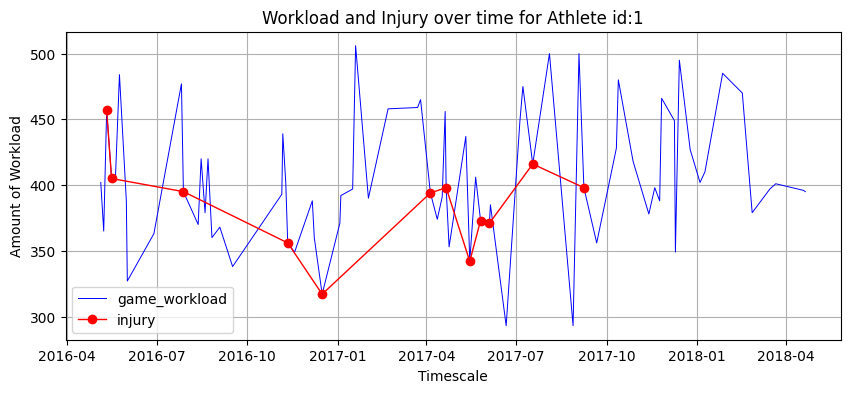

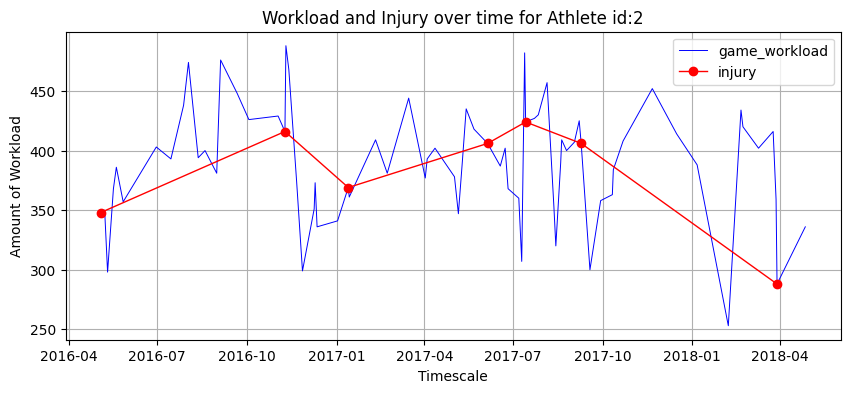

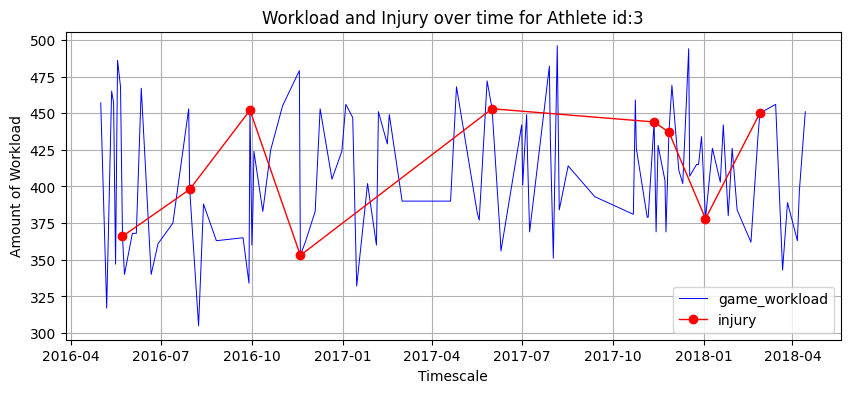

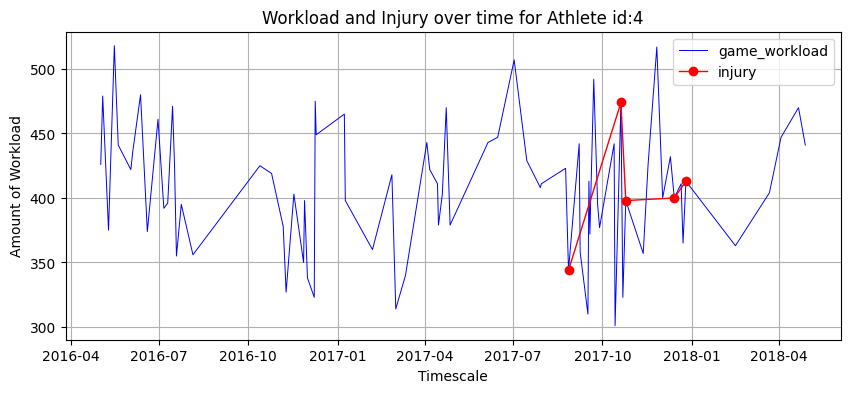

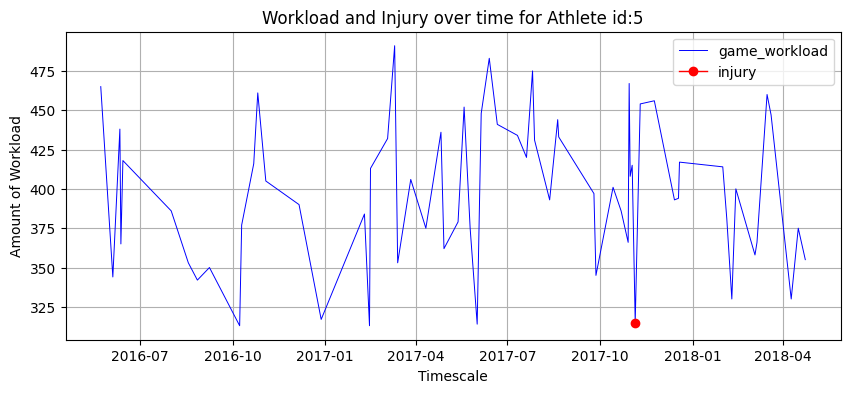

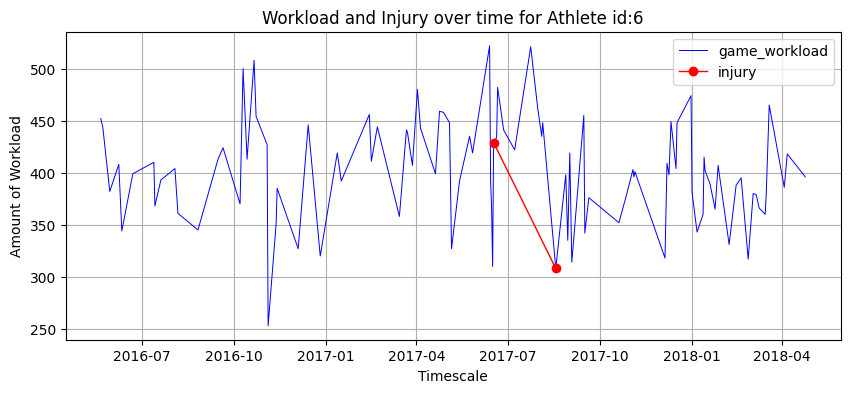

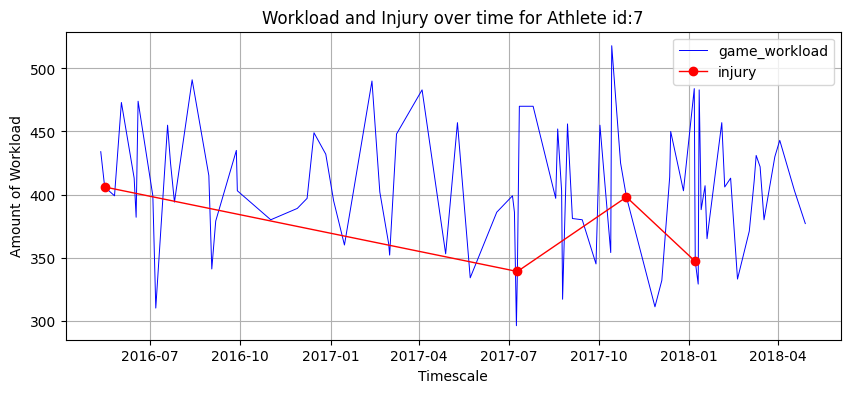

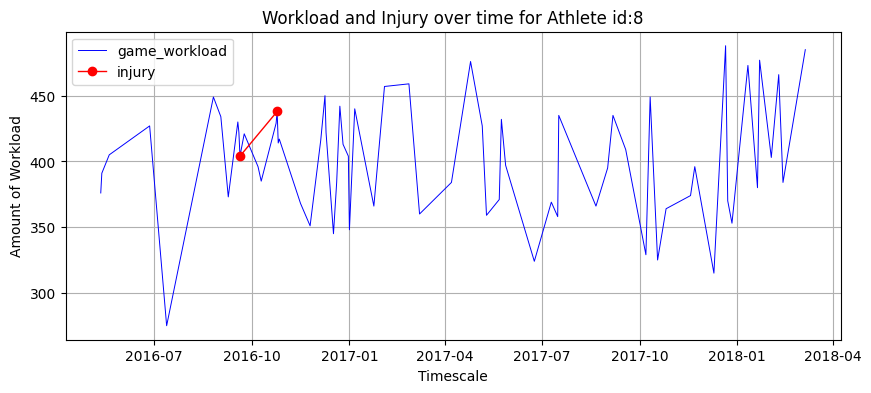

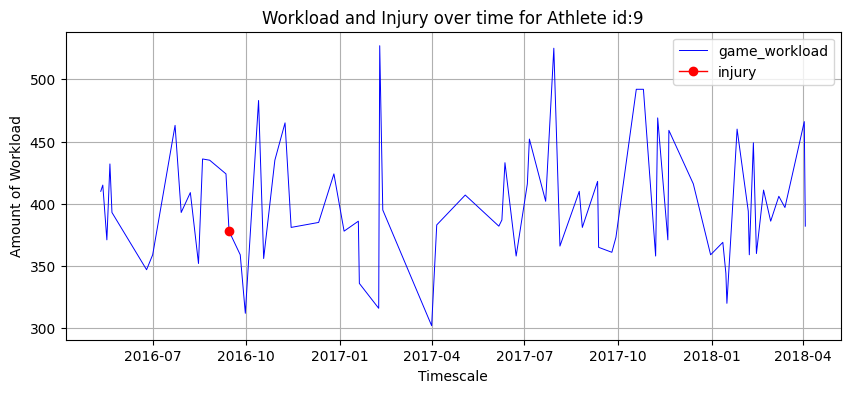

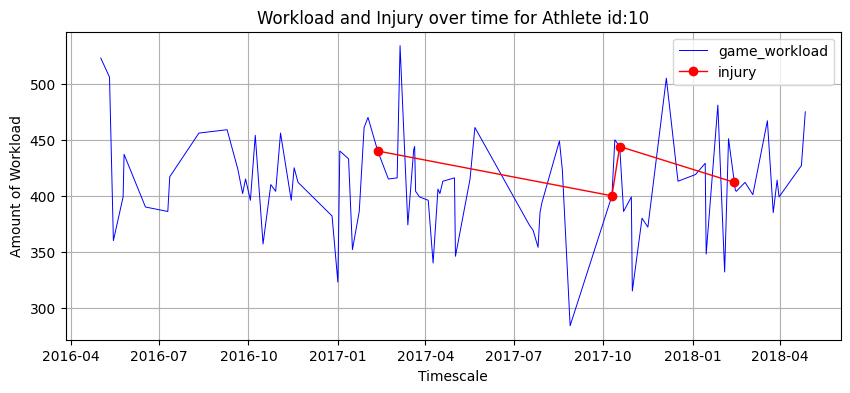

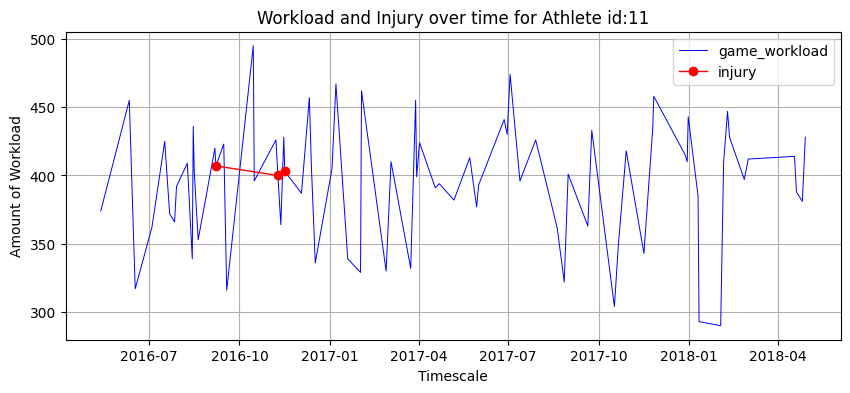

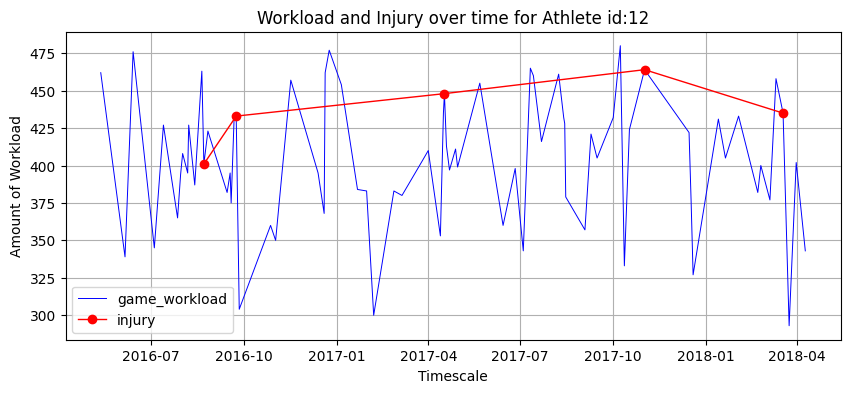

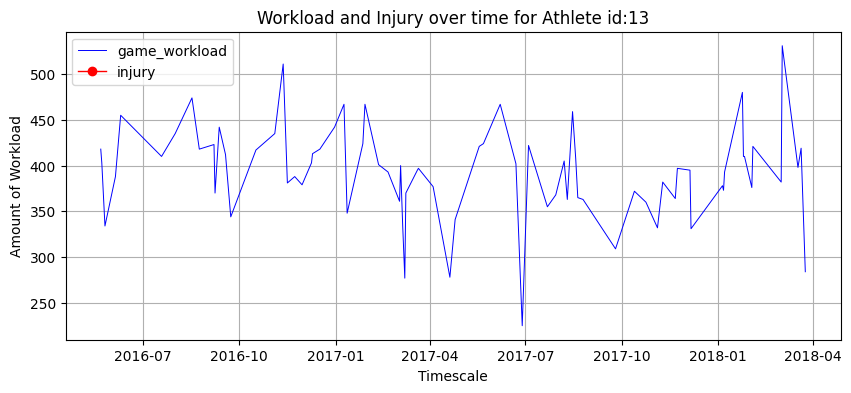

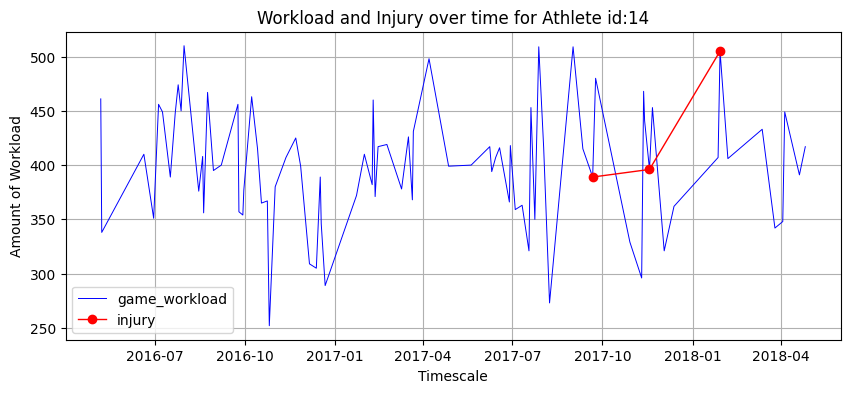

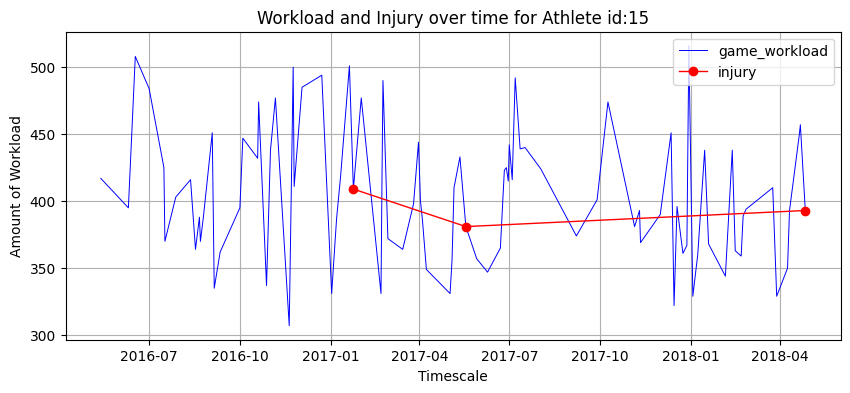

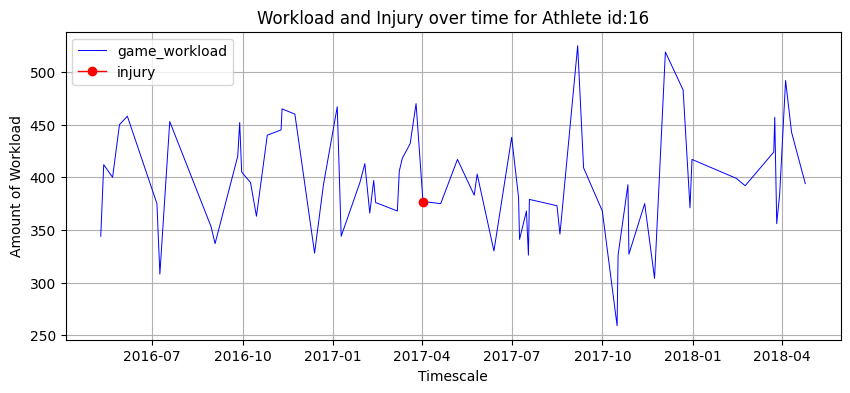

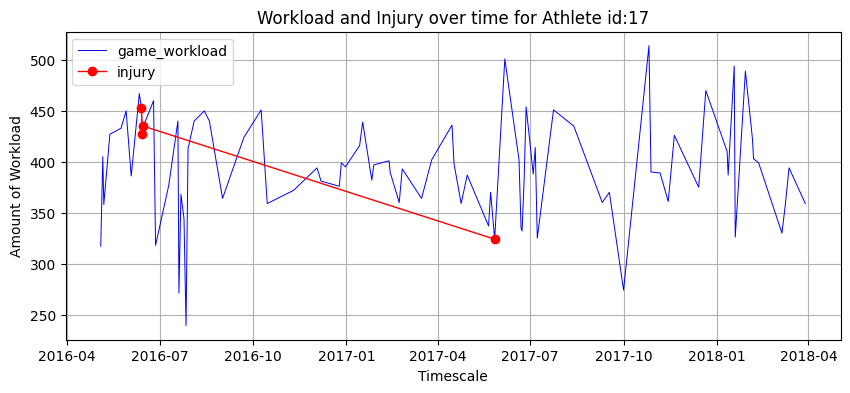

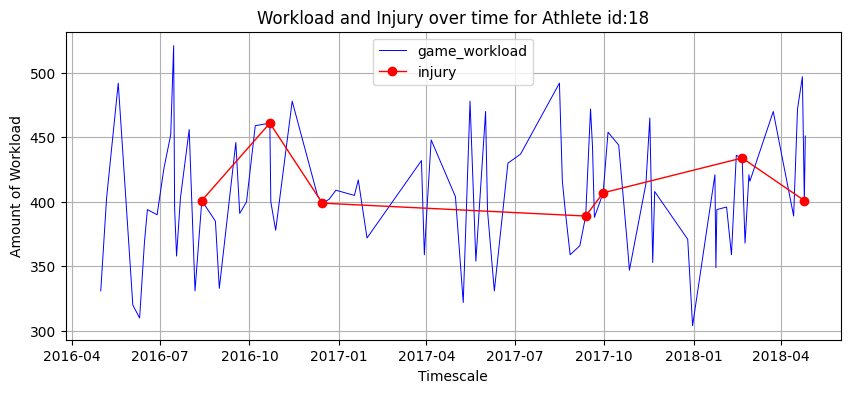

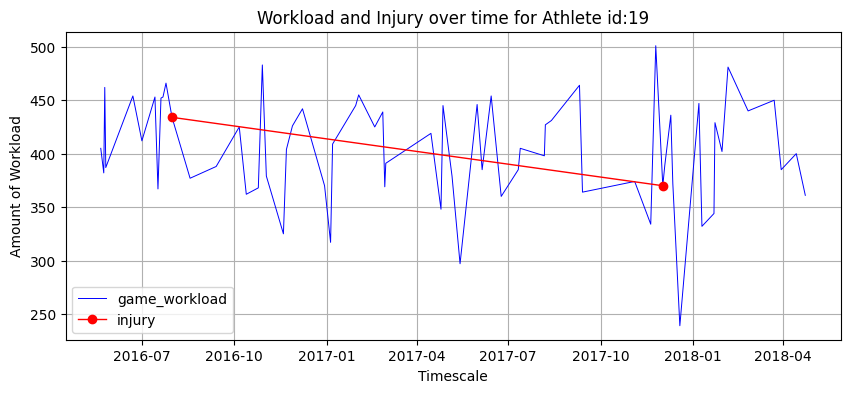

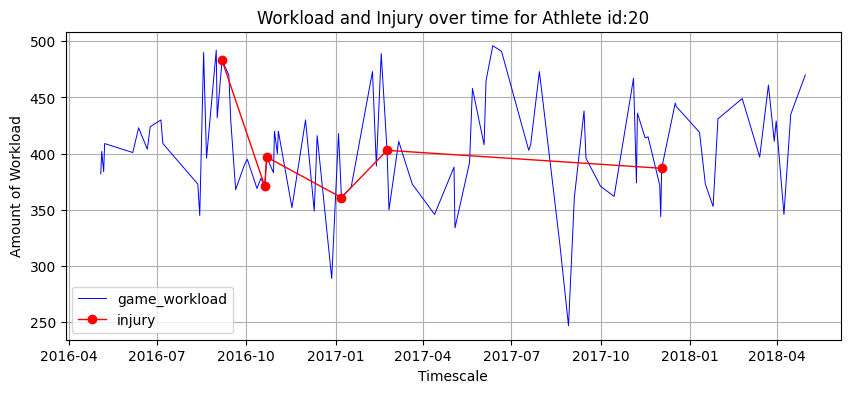

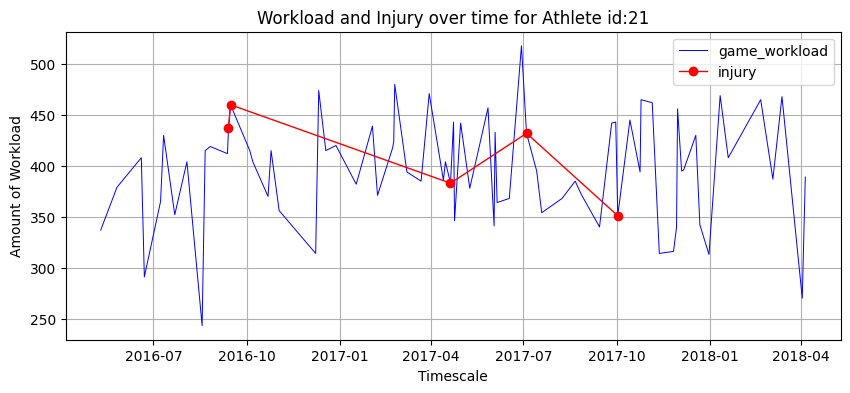

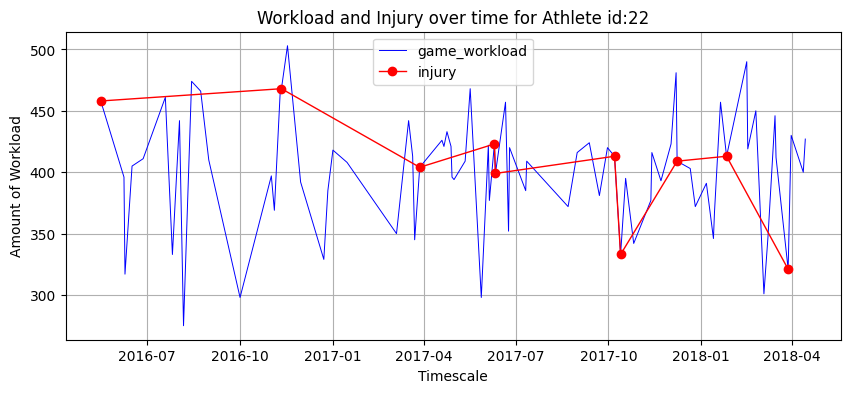

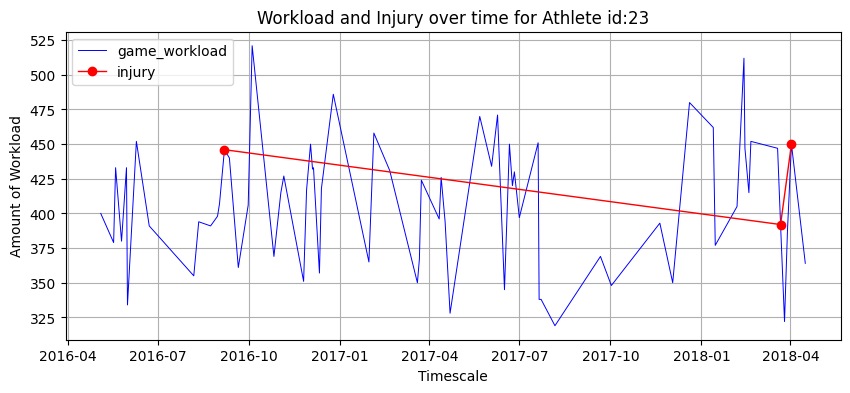

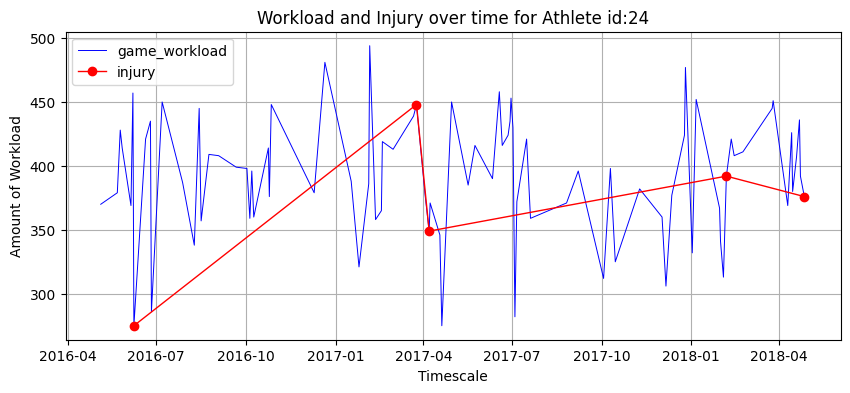

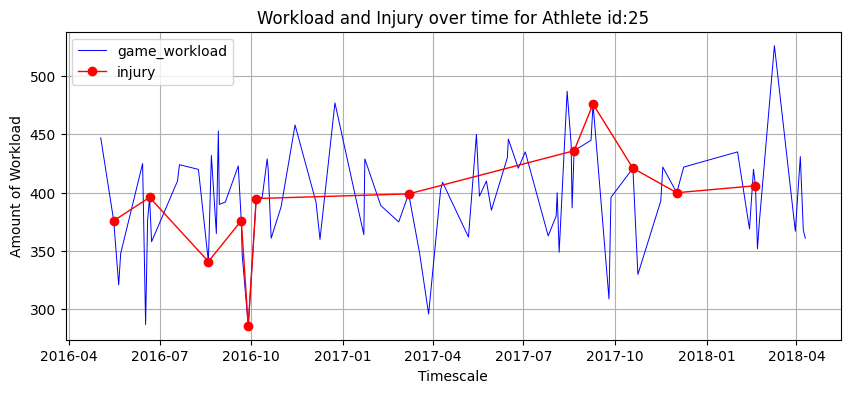

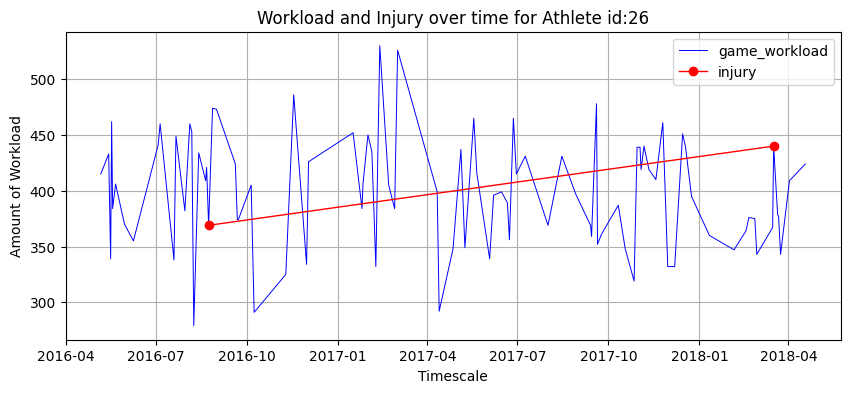

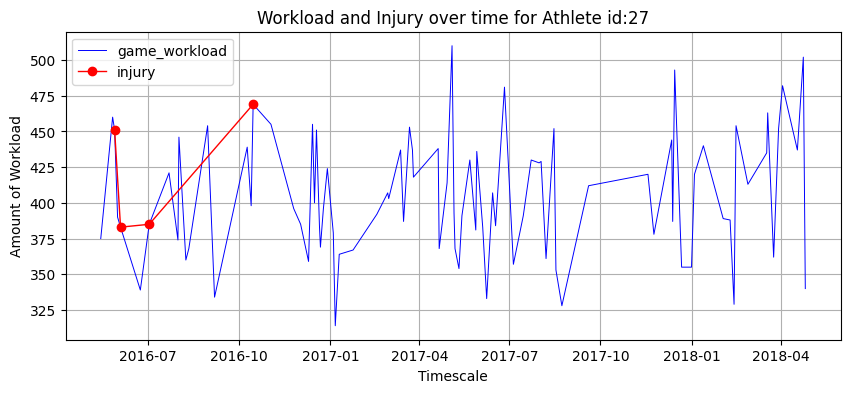

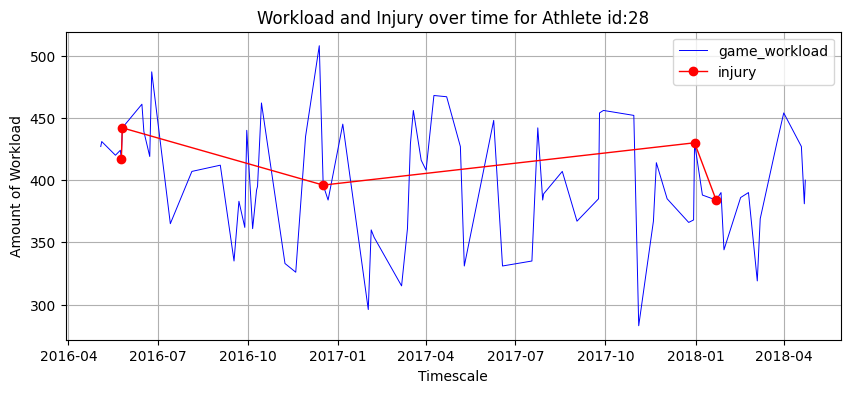

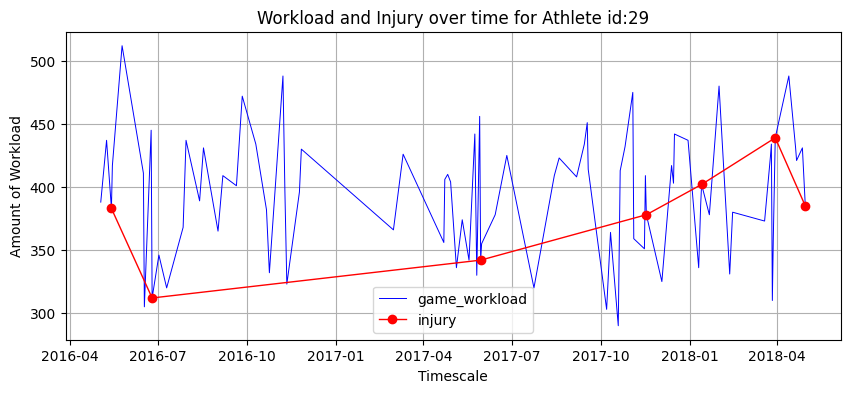

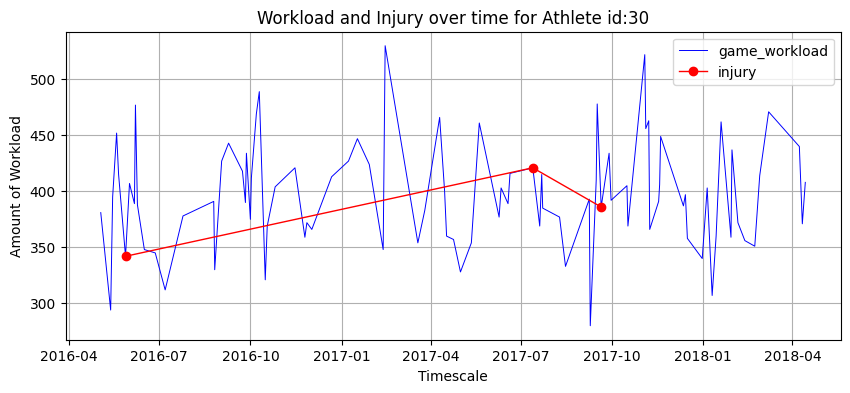

In [28]:
rcParams['figure.figsize'] = 10, 4
for i in range(1,31):
    plt.plot(games_data[games_data.athlete_id == i]['date'],games_data[games_data.athlete_id == i]['game_workload'],
             color='blue', linewidth=0.7)
    plt.plot(games_data[(games_data.athlete_id == i) & (games_data.injury == "Yes")]['date'],
             games_data[(games_data.athlete_id == i) & (games_data.injury == "Yes")]['game_workload'],
             color='red', linewidth=1, marker='o')
    plt.grid()
    plt.legend(['game_workload', 'injury'])
    plt.xlabel('Timescale')
    plt.ylabel('Amount of Workload')
    plt.title('Workload and Injury over time for Athlete id:' + str(i))
    plt.show()

In [29]:
metric_df = pd.read_csv("Downloads/metrics.csv")

In [30]:
metrics_df = metric_df.pivot_table('value', ['athlete_id', 'date'], 'metric').reset_index()

In [31]:
metric_df.head()

athlete_id        date        metric  value
0           1  2016-05-01  hip_mobility     36
1           1  2016-05-02  hip_mobility     36
2           1  2016-05-03  hip_mobility     56
3           1  2016-05-04  hip_mobility     24
4           1  2016-05-05  hip_mobility     35

In [32]:
metrics_df['date'] = metrics_df['date'].astype('datetime64[ns]')
metrics_df.dtypes

metric
athlete_id                int64
date             datetime64[ns]
groin_squeeze           float64
hip_mobility            float64
dtype: object

In [33]:
final_data = pd.merge(games_data,metrics_df,  how='left', left_on=['athlete_id','date'], right_on = ['athlete_id','date'])

In [34]:
final_data.head()

athlete_id       date  game_workload injury  groin_squeeze  hip_mobility
0           1 2016-05-05            402     No          284.0          35.0
1           1 2016-05-08            365     No          250.0          41.0
2           1 2016-05-11            457    Yes          331.0          33.0
3           1 2016-05-16            405    Yes          260.0          38.0
4           1 2016-05-20            407     No          378.0          60.0

# Plotting for groin squeeze metrics vs injuries over time for each player

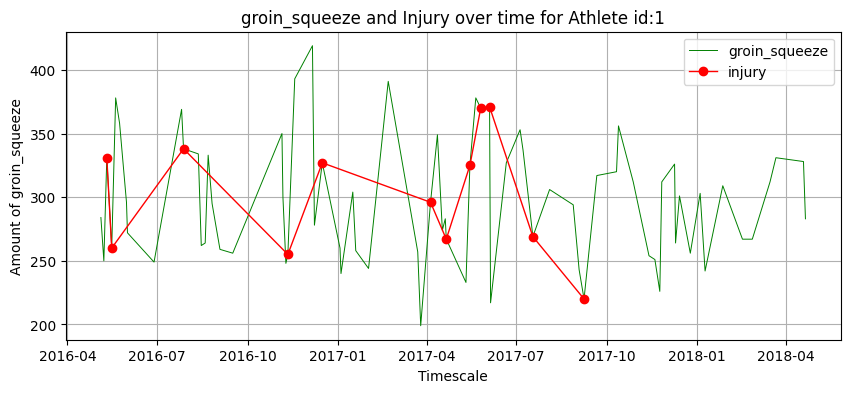

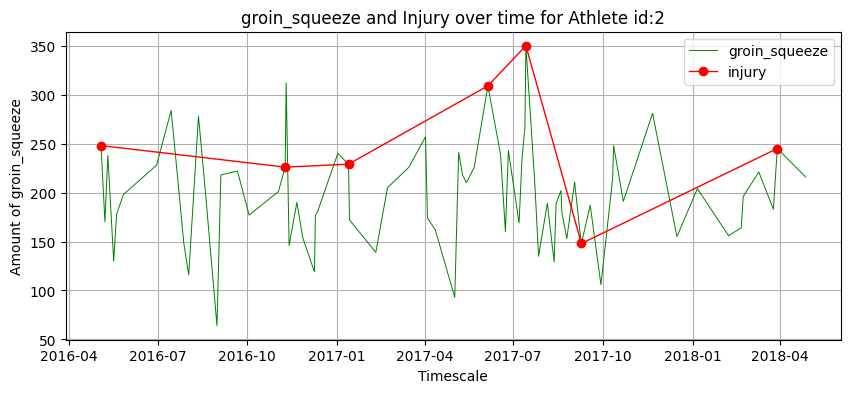

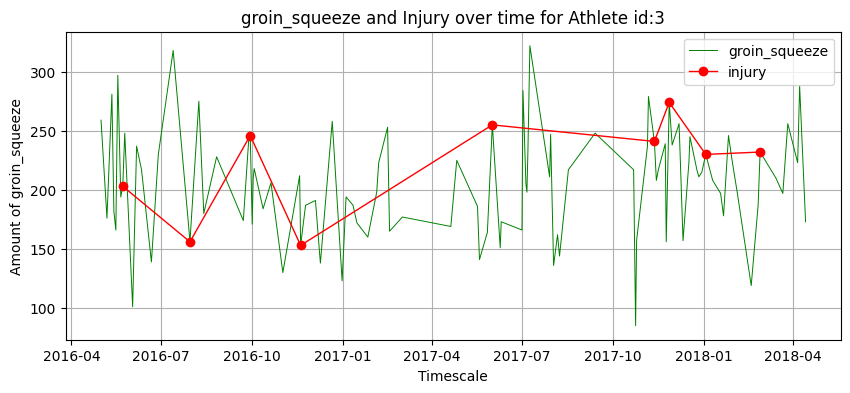

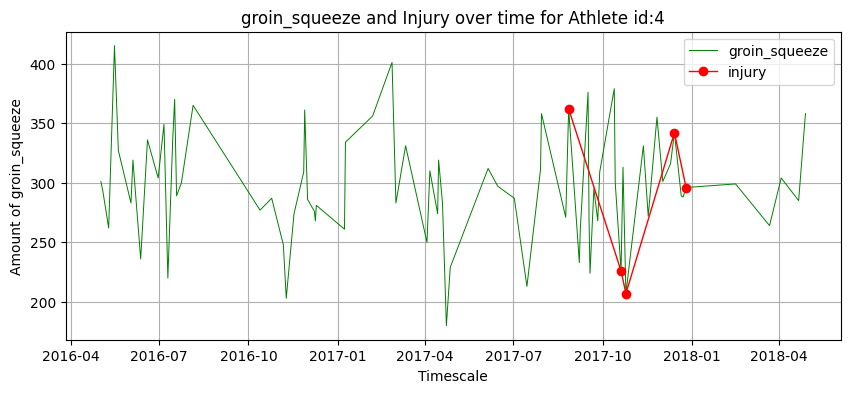

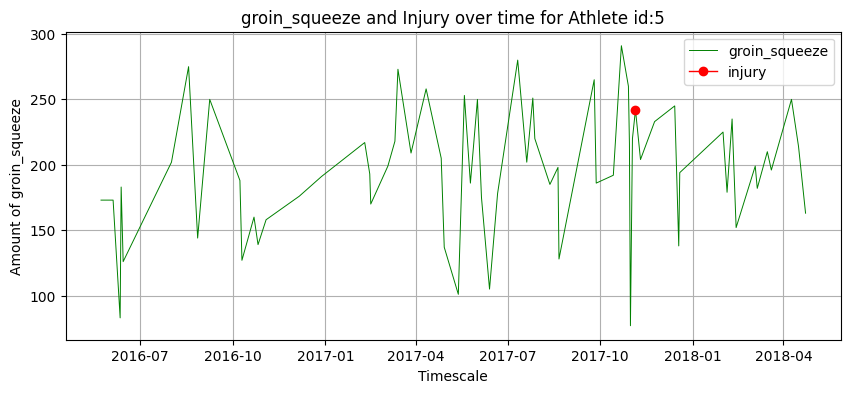

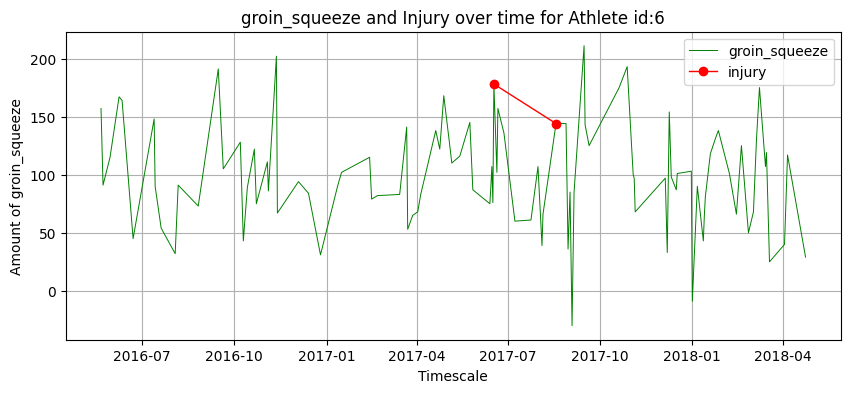

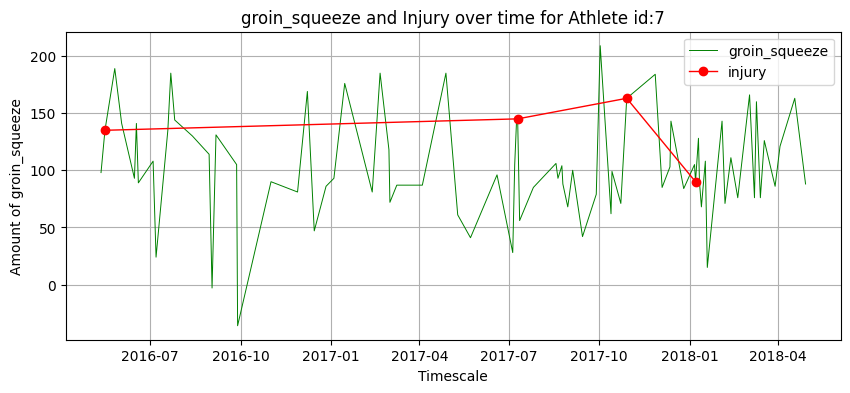

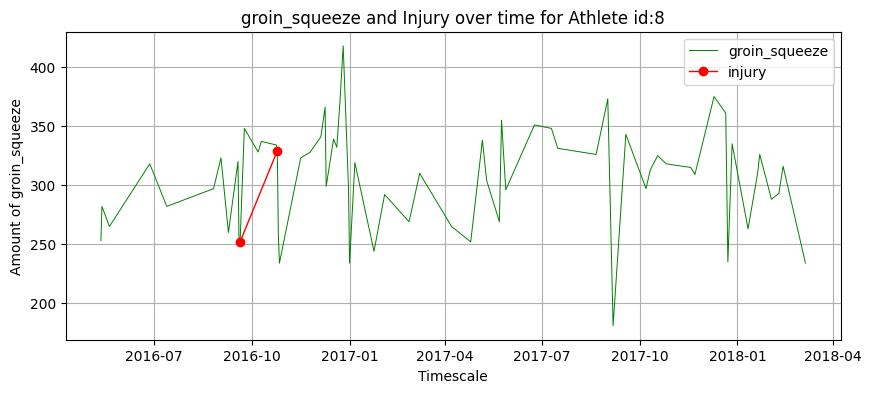

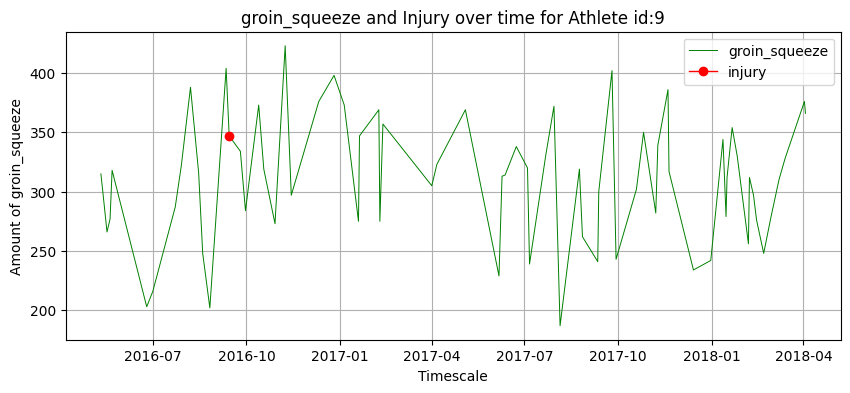

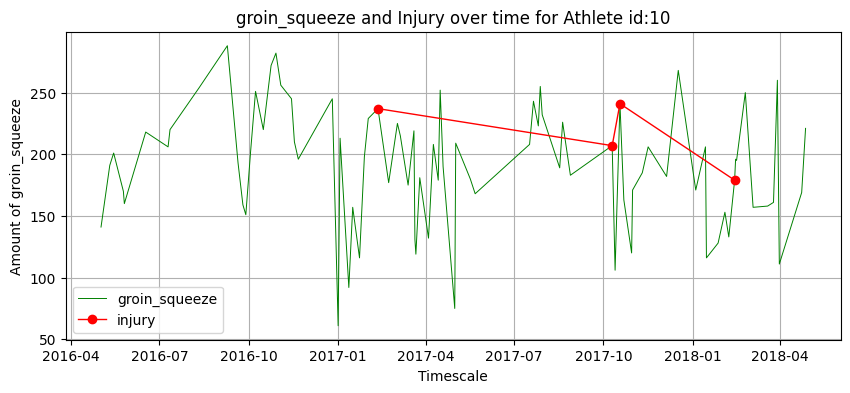

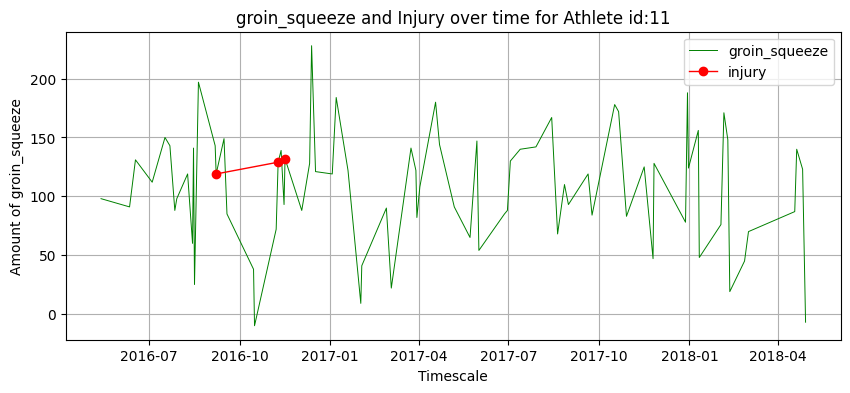

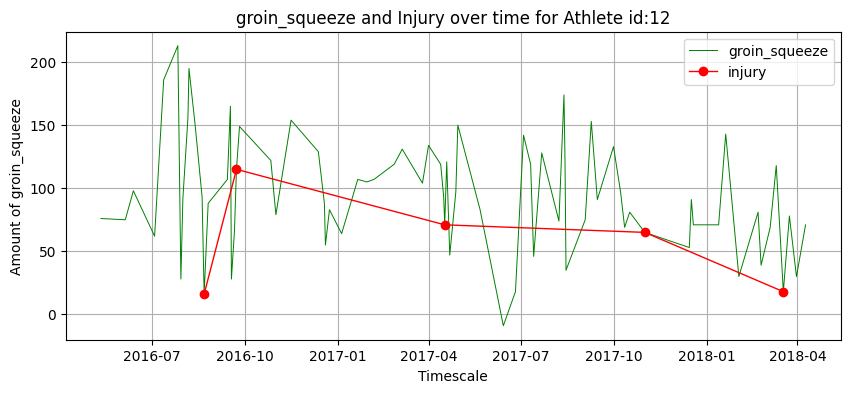

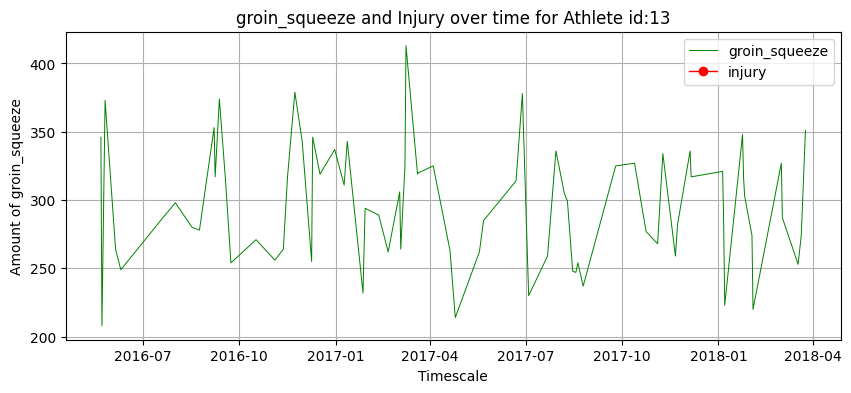

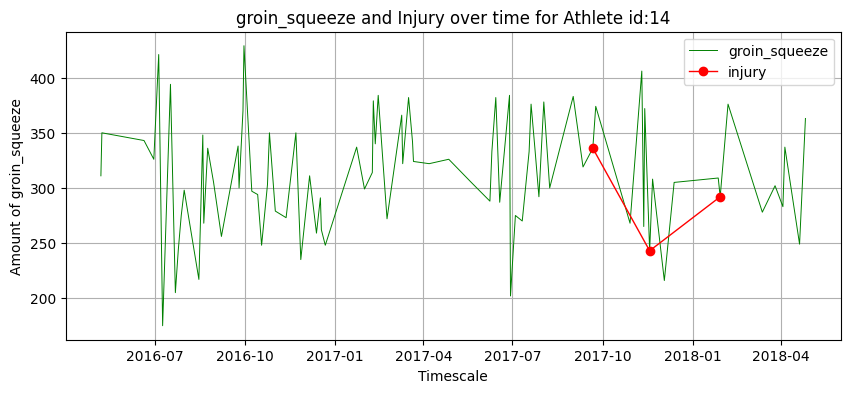

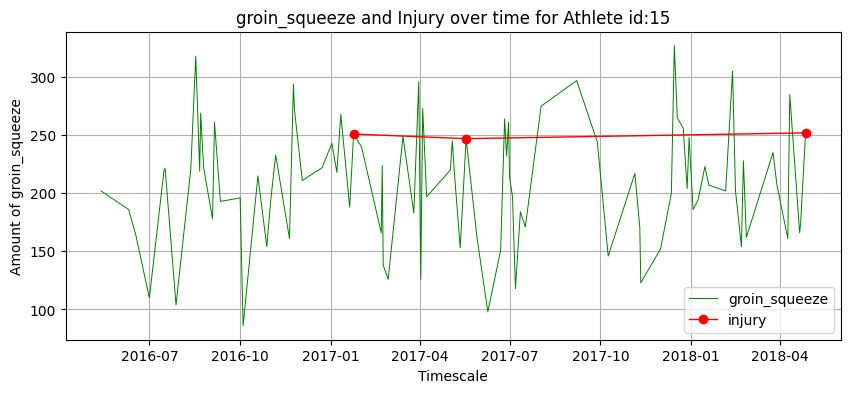

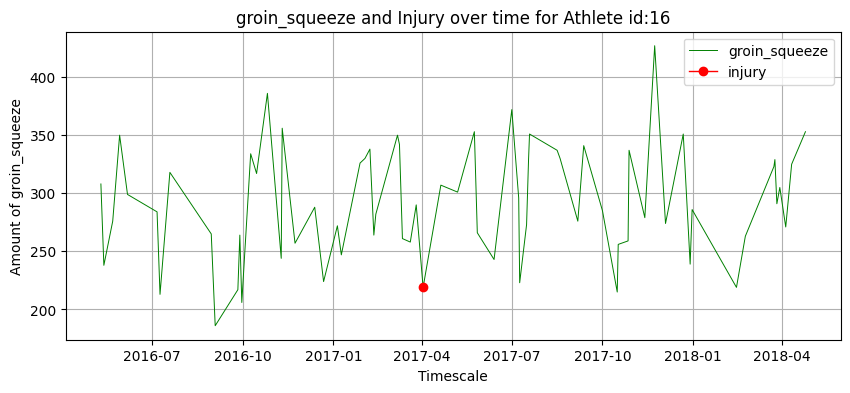

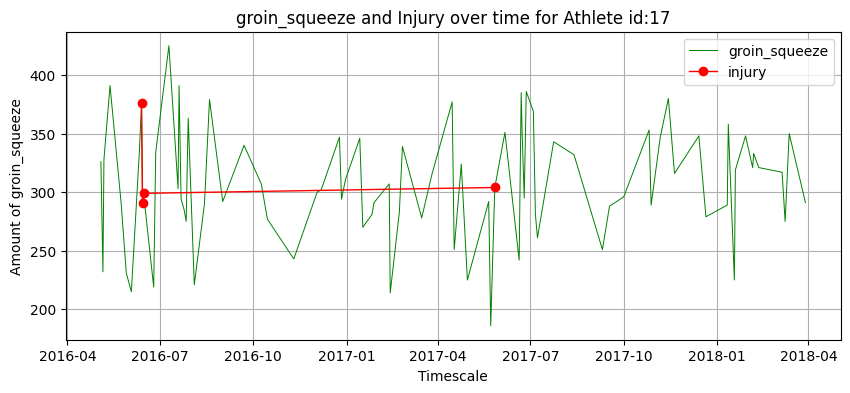

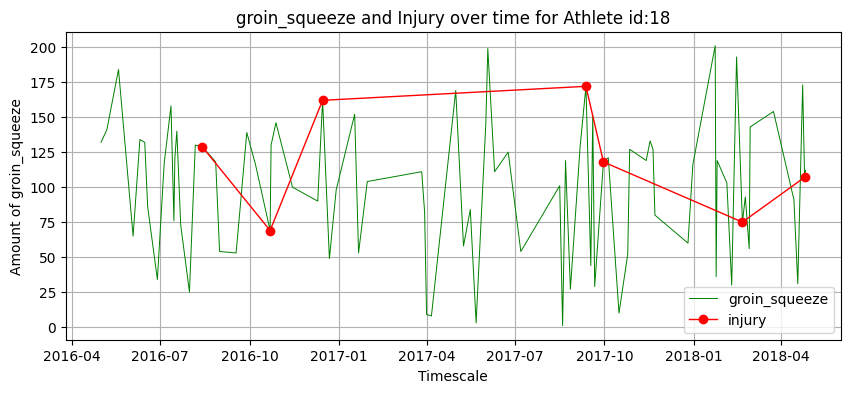

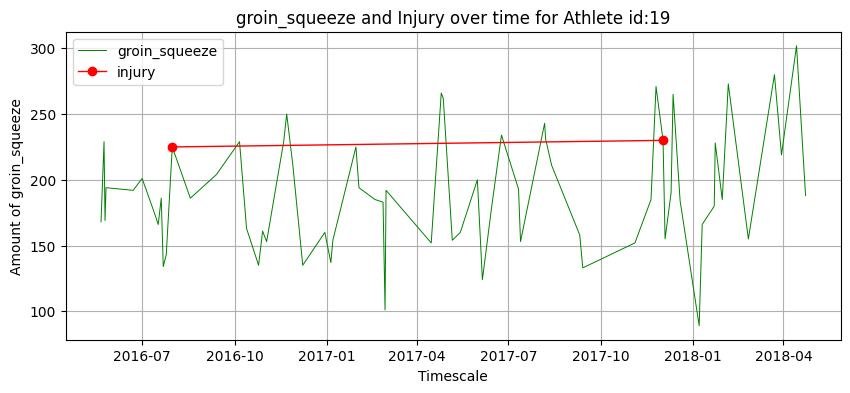

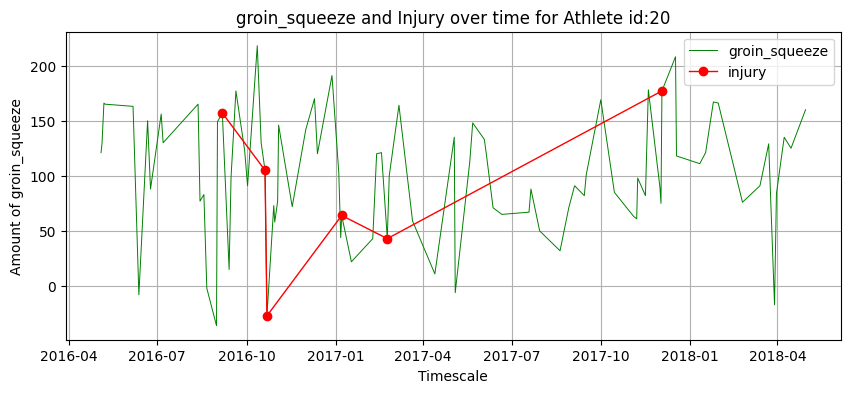

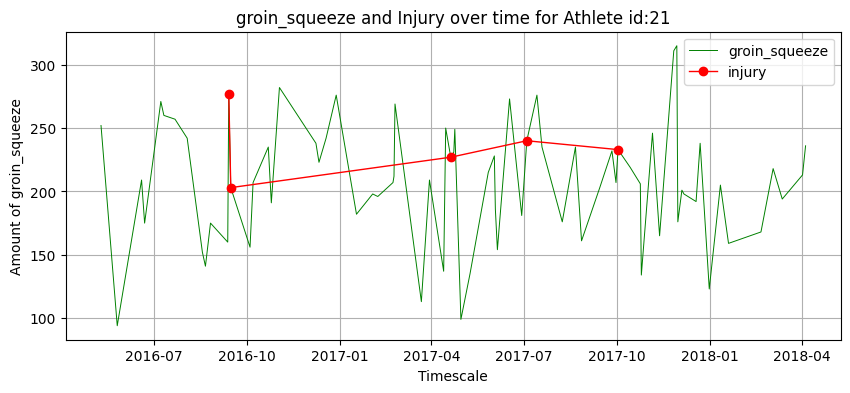

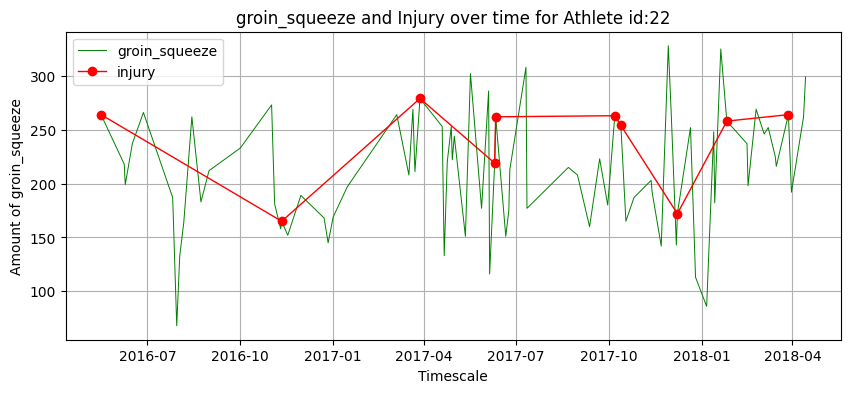

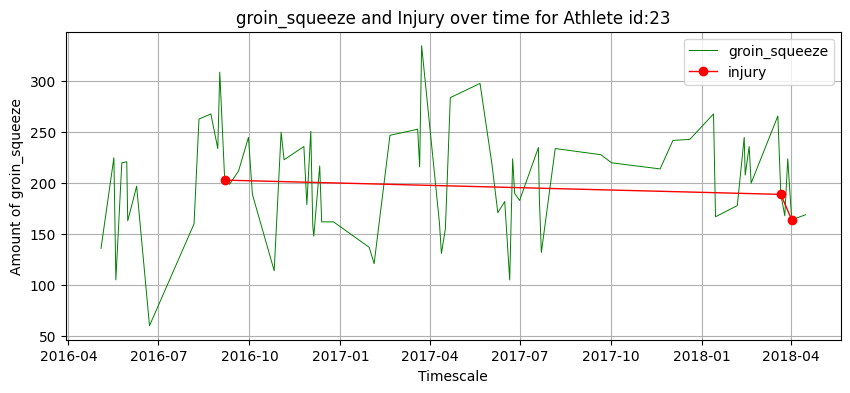

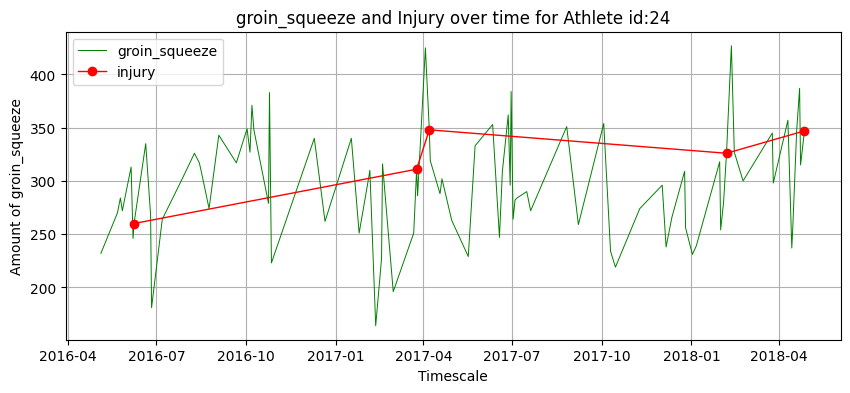

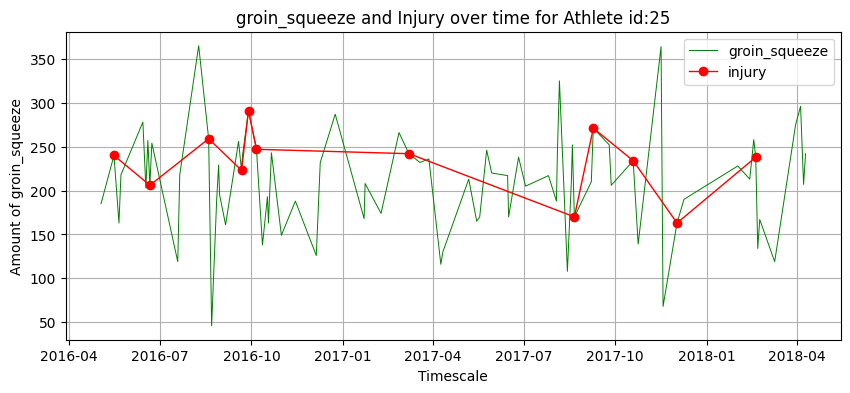

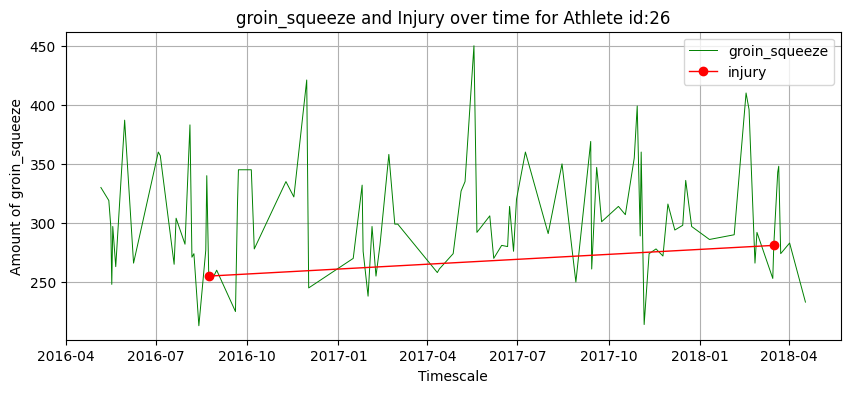

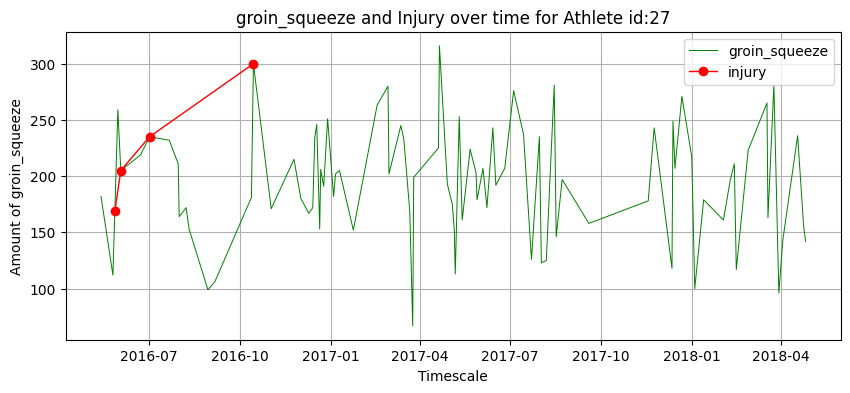

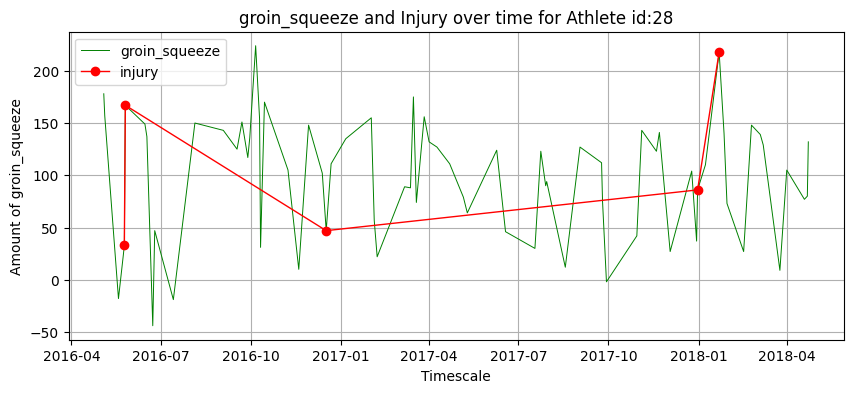

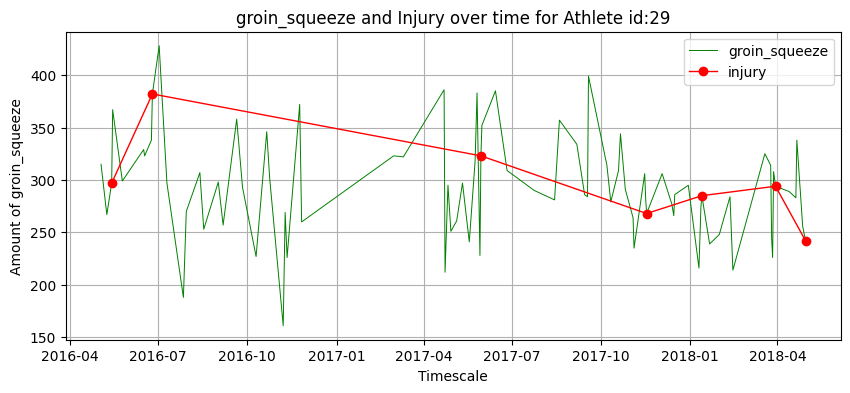

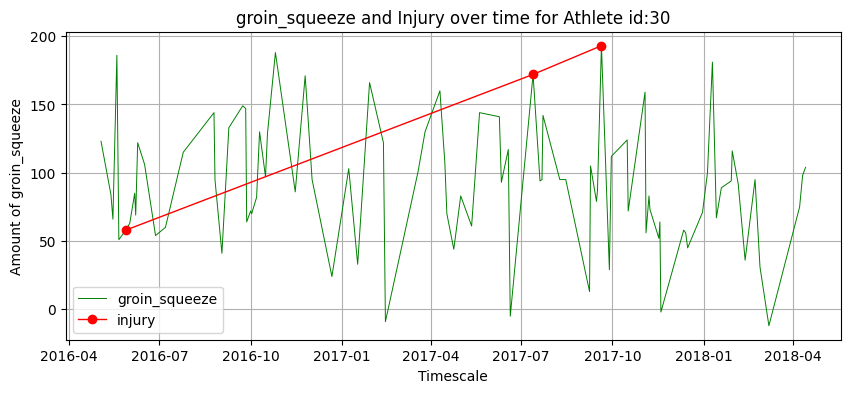

In [35]:
rcParams['figure.figsize'] = 10, 4
for i in range(1,31):
    plt.plot(final_data[final_data.athlete_id == i]['date'],final_data[final_data.athlete_id == i]['groin_squeeze'],
             color='green', linewidth=0.7)
    plt.plot(final_data[(final_data.athlete_id == i) & (final_data.injury == "Yes")]['date'],
             final_data[(final_data.athlete_id == i) & (final_data.injury == "Yes")]['groin_squeeze'],
             color='red', linewidth=1, marker='o')
    plt.grid()
    plt.legend(['groin_squeeze', 'injury'])
    plt.xlabel('Timescale')
    plt.ylabel('Amount of groin_squeeze')
    plt.title('groin_squeeze and Injury over time for Athlete id:' + str(i))
    plt.show()

In [36]:
"More groin squeeze tends to cause more injuries when observed kneenly from the above graphs"


'More groin squeeze tends to cause more injuries when observed kneenly from the above graphs'

In [37]:
final_data['rest_period'] = final_data.groupby('athlete_id')['date'].diff()

In [38]:
first_day = '2016-05-01'
date_object = pd.to_datetime(first_day)

In [39]:
final_data["rest_period"].fillna(final_data['date'] - date_object, inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_21592\3327428391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data["rest_period"].fillna(final_data['date'] - date_object, inplace = True)


In [41]:
final_data['rest_period'] = final_data['rest_period'].astype('timedelta64[ns]')

In [42]:
final_data.head()

athlete_id       date  game_workload injury  groin_squeeze  hip_mobility  \
0           1 2016-05-05            402     No          284.0          35.0   
1           1 2016-05-08            365     No          250.0          41.0   
2           1 2016-05-11            457    Yes          331.0          33.0   
3           1 2016-05-16            405    Yes          260.0          38.0   
4           1 2016-05-20            407     No          378.0          60.0   

  rest_period  
0      4 days  
1      3 days  
2      3 days  
3      5 days  
4      4 days

# Plotting number of resting days vs injuries over time for each player

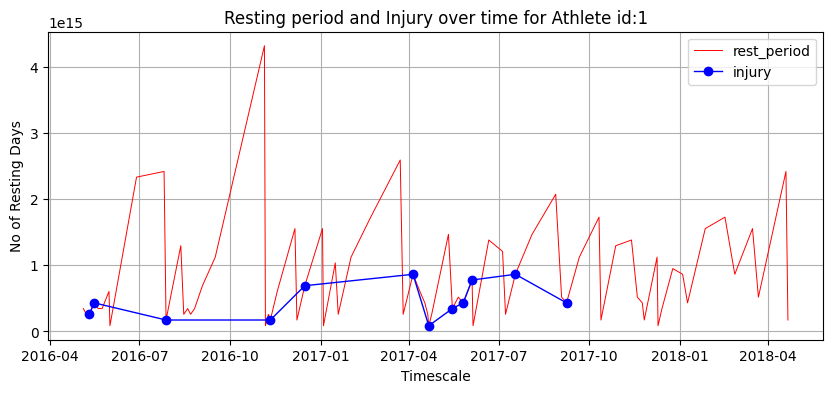

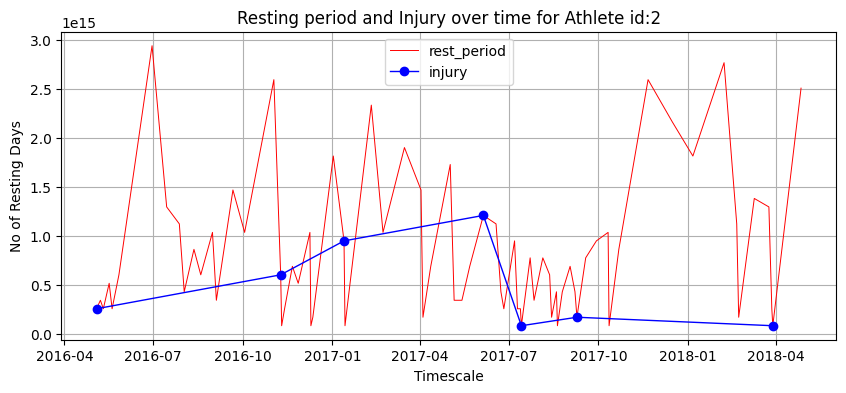

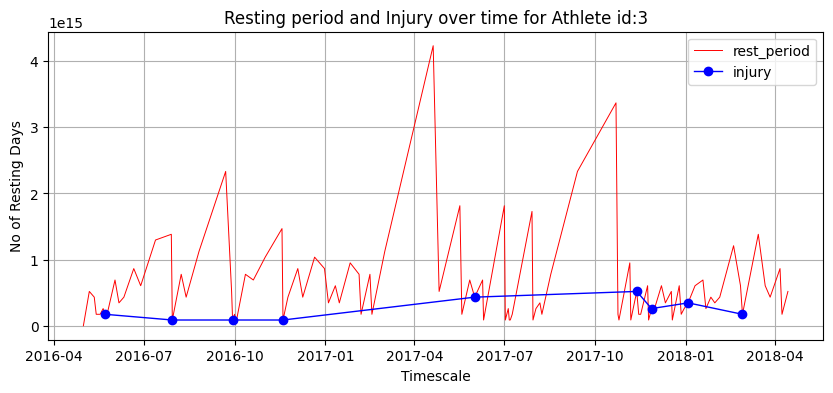

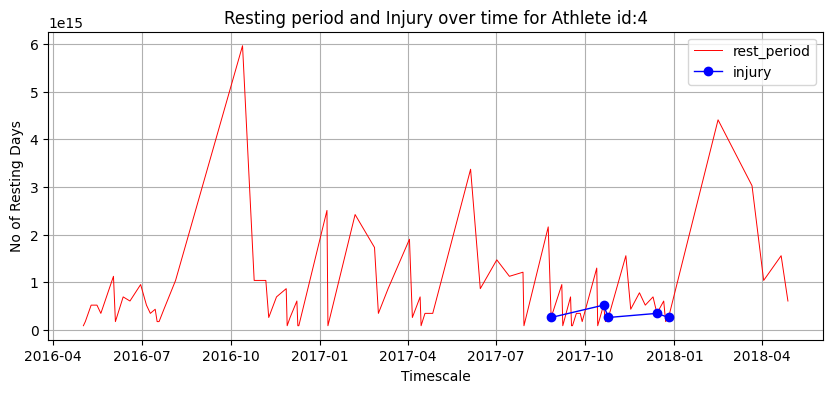

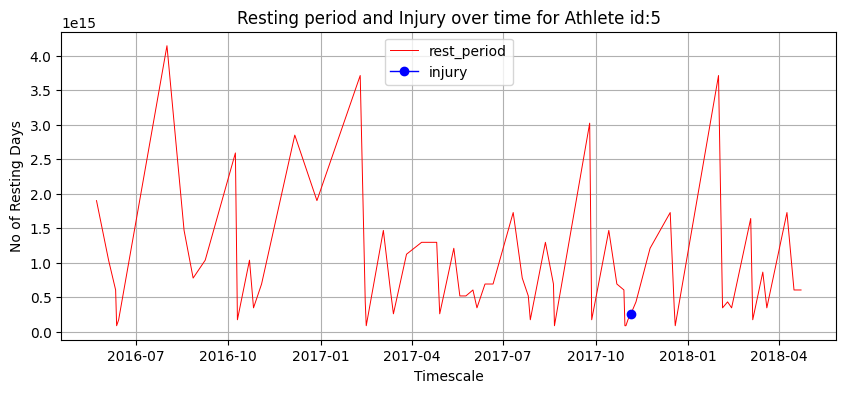

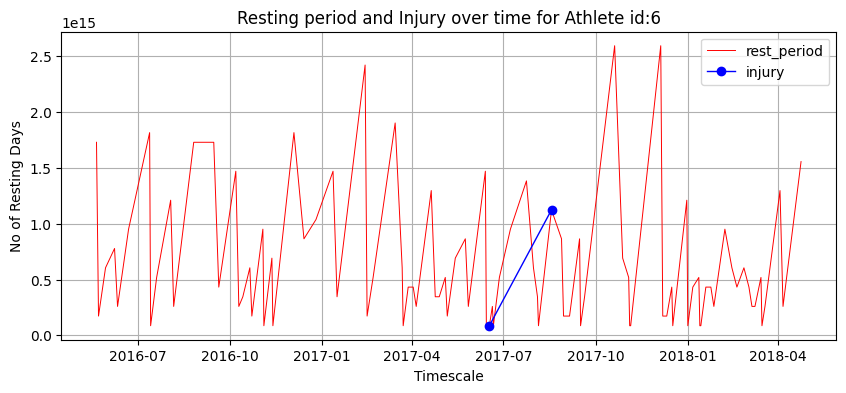

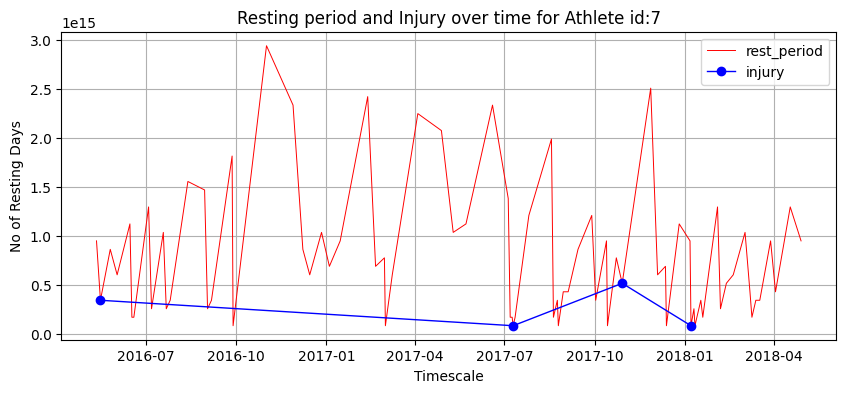

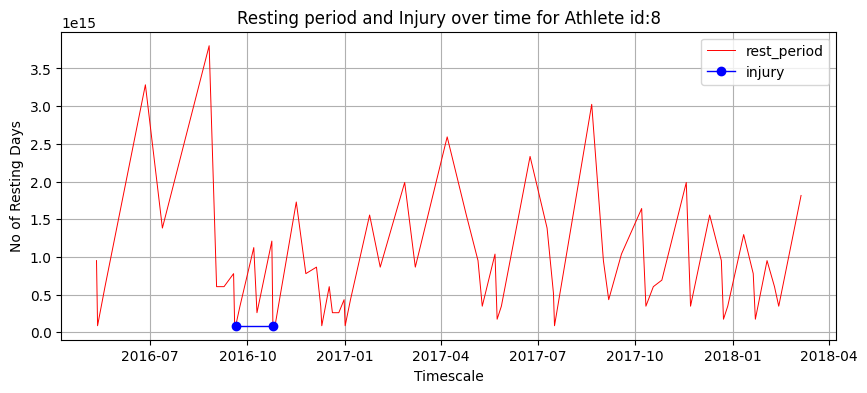

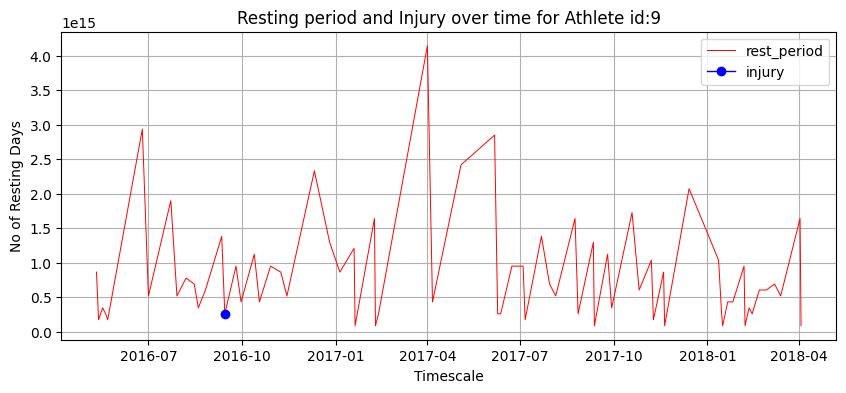

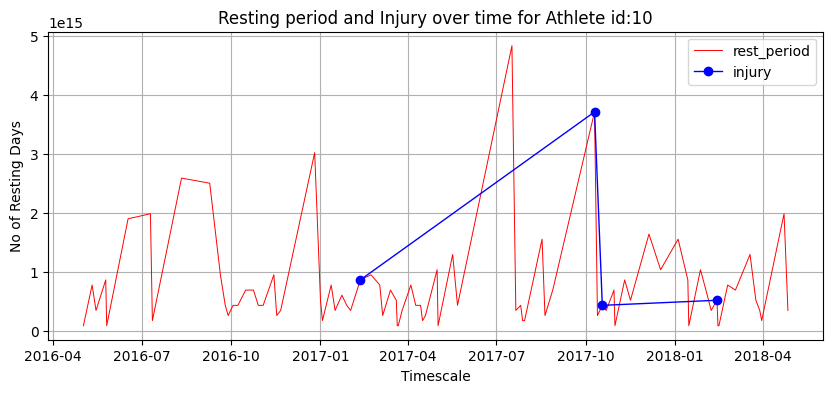

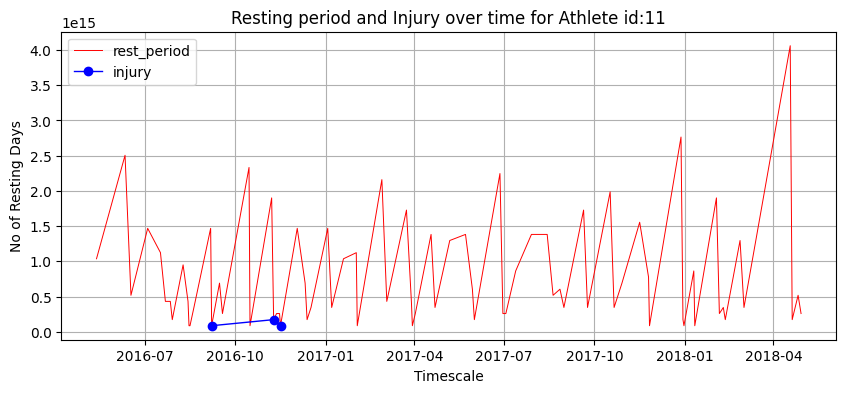

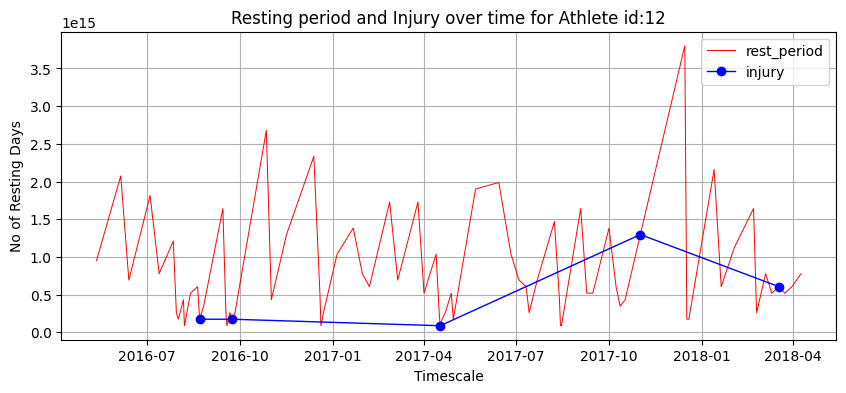

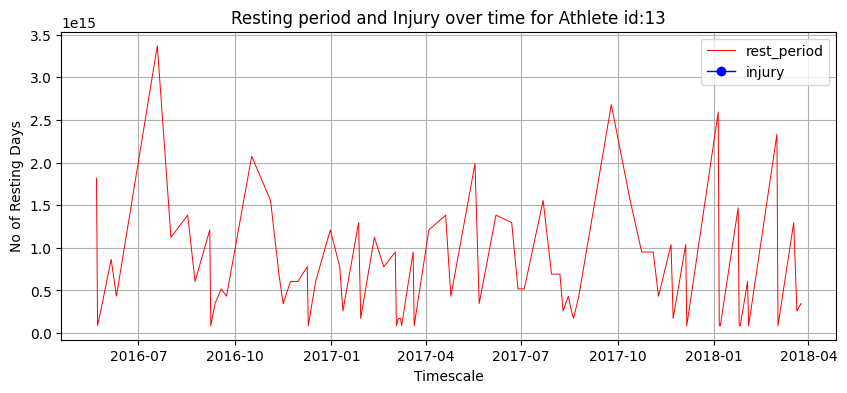

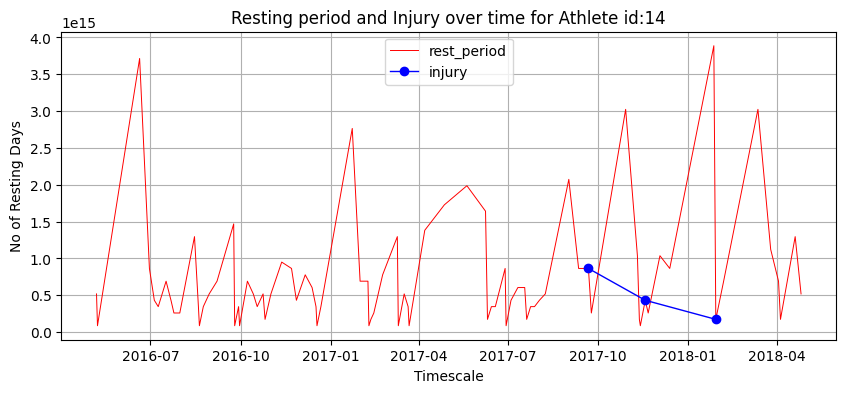

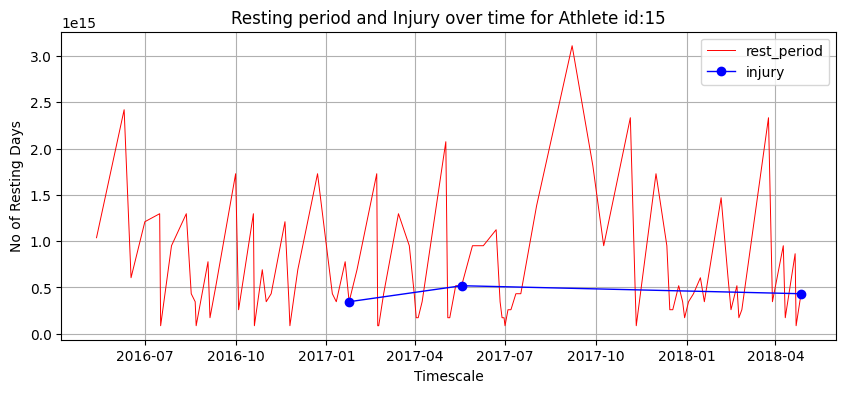

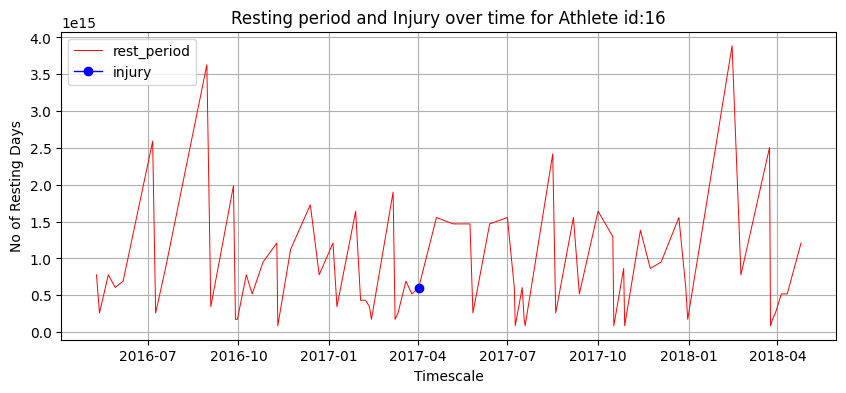

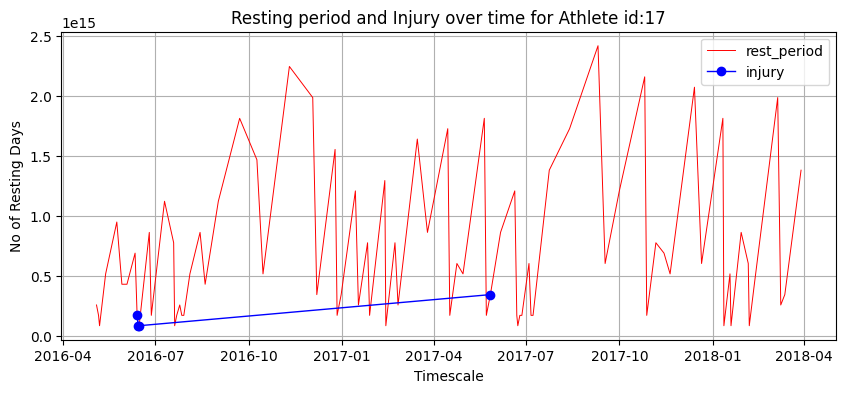

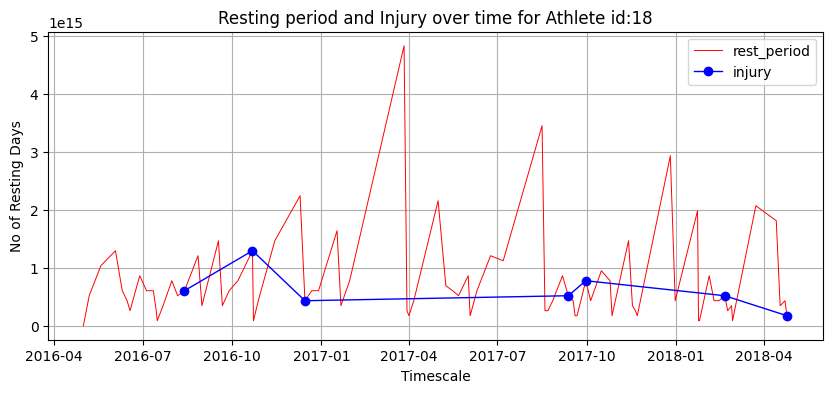

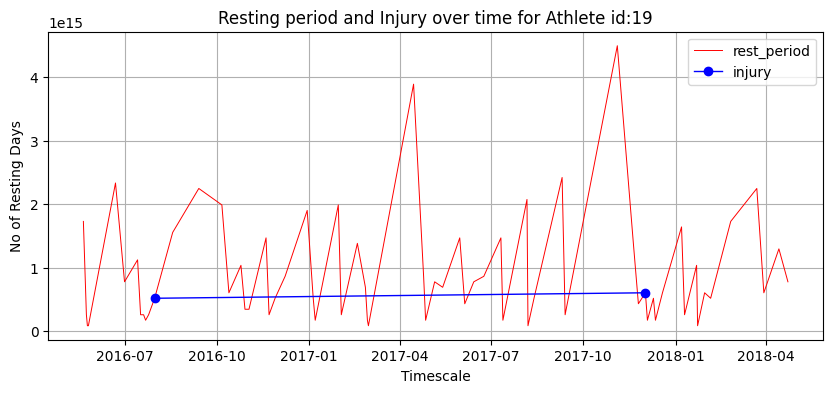

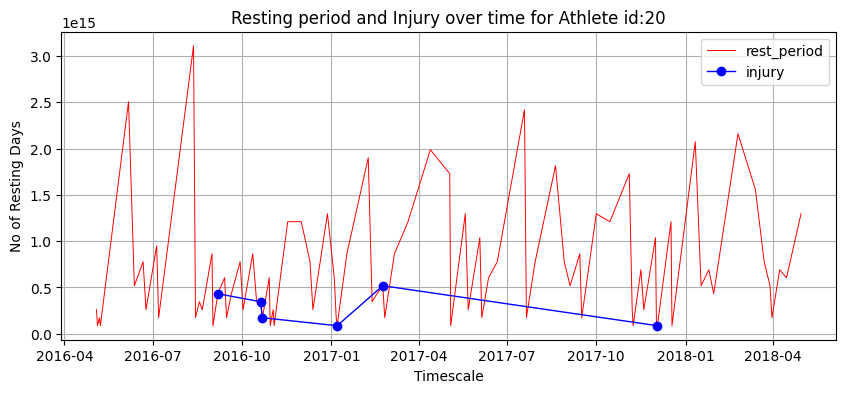

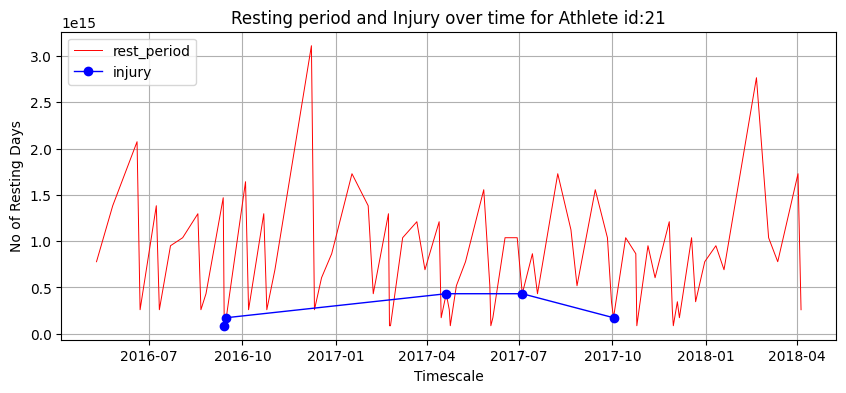

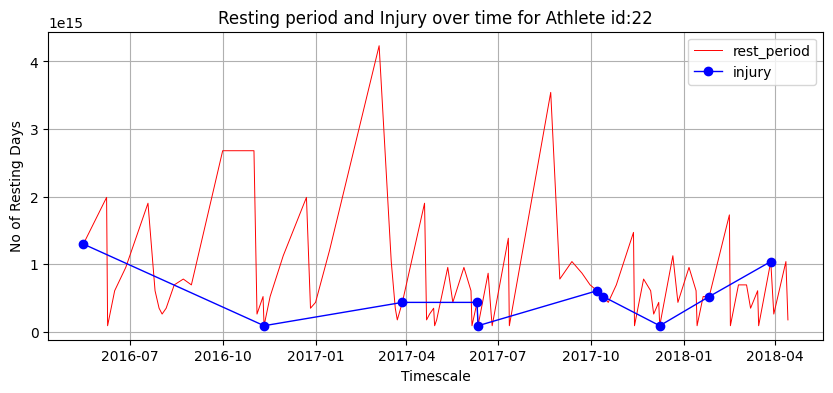

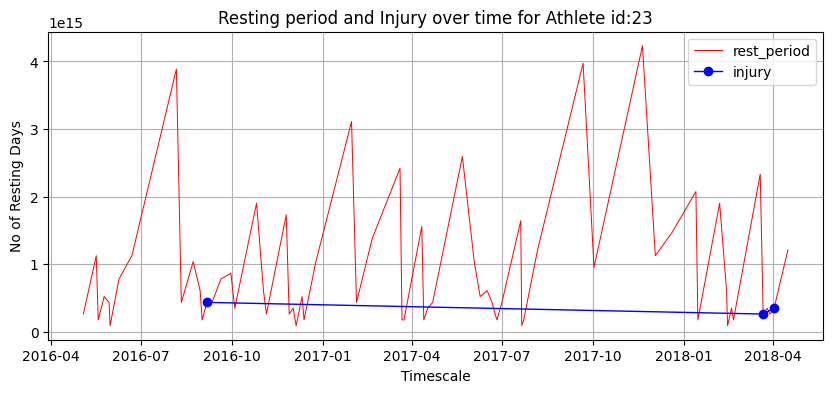

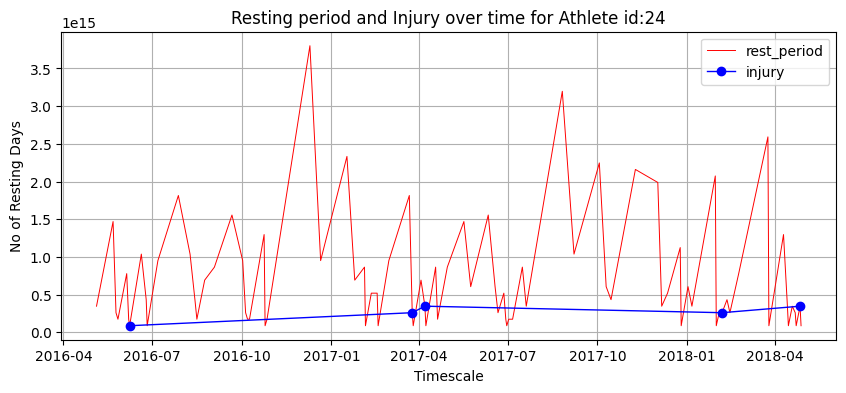

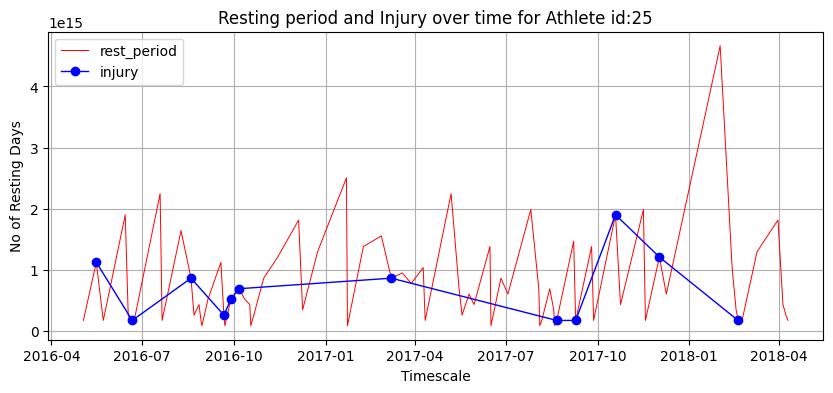

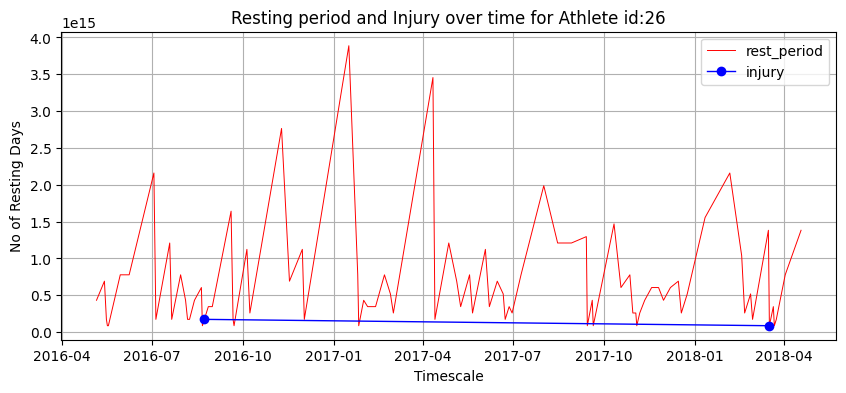

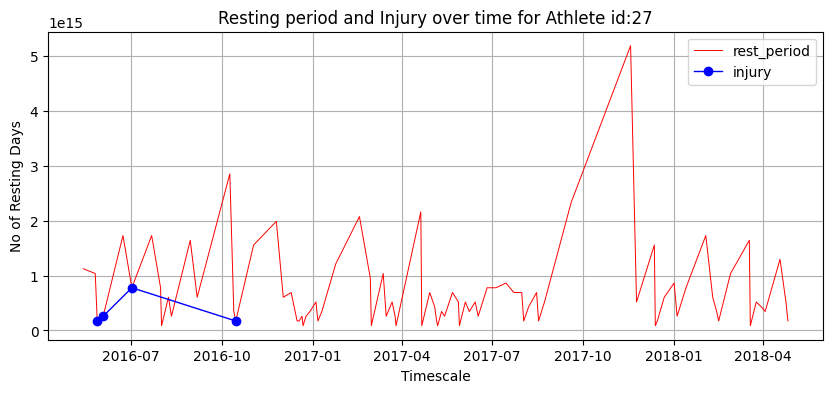

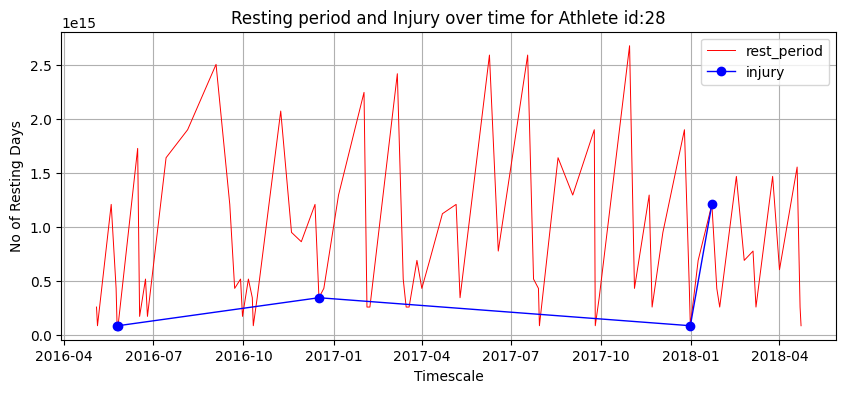

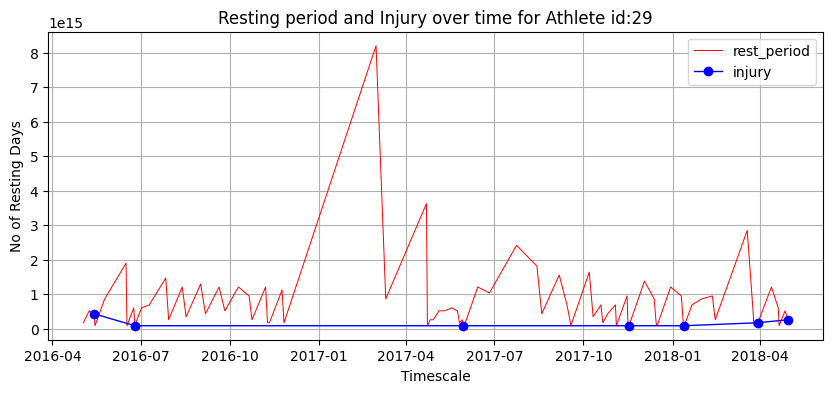

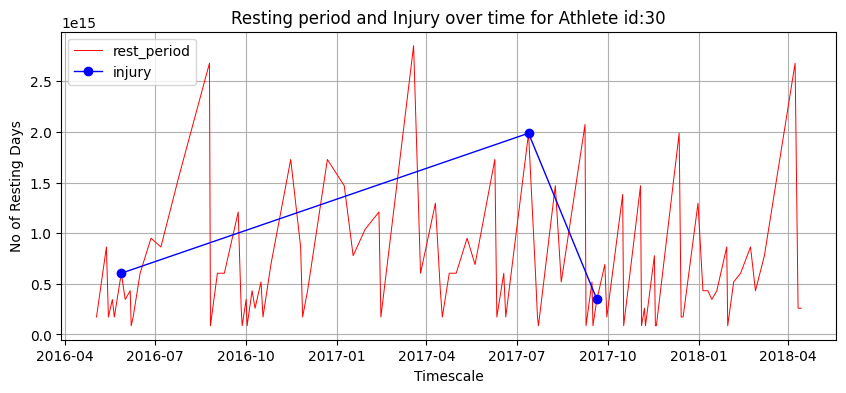

In [43]:
for i in range(1,31):
    plt.plot(final_data[final_data.athlete_id == i]['date'],final_data[final_data.athlete_id == i]['rest_period'],
             color='red', linewidth=0.7)
    plt.plot(final_data[(final_data.athlete_id == i) & (final_data.injury == "Yes")]['date'],
             final_data[(final_data.athlete_id == i) & (final_data.injury == "Yes")]['rest_period'],
             color='blue', linewidth=1, marker='o')
    plt.grid()
    plt.legend(['rest_period', 'injury'])
    plt.xlabel('Timescale')
    plt.ylabel('No of Resting Days')
    plt.title('Resting period and Injury over time for Athlete id:' + str(i))
    plt.show()

In [44]:
"Some connection can be seen here, as games with more resting days tend to have less injuries"

'Some connection can be seen here, as games with more resting days tend to have less injuries'

## Some extra analysis

In [45]:
workload_counts = workload_df.groupby("athlete_id")['date'].count().sort_values().reset_index()

In [46]:
workload_counts = workload_counts.rename(columns={'date':'total_games'})
workload_counts.head()

athlete_id  total_games
0           5           65
1           8           66
2          19           67
3          16           69
4          23           69

In [47]:
injury_counts = injuries_df.groupby("athlete_id").count().reset_index()
injury_counts = injury_counts.drop('date', axis =1)
injury_counts.head()

athlete_id  injury
0           1      12
1           2       7
2           3       9
3           4       5
4           5       1

In [48]:
player_stats = pd.merge(workload_counts,injury_counts, how='left', left_on=['athlete_id',], right_on = ['athlete_id'])

In [49]:
player_stats.fillna(0, inplace= True)
player_stats.head()

athlete_id  total_games  injury
0           5           65     1.0
1           8           66     2.0
2          19           67     2.0
3          16           69     1.0
4          23           69     3.0

In [50]:
"Calculating fitness ratio"
player_stats['fitness_ratio'] = (1-(player_stats['injury'] / player_stats['total_games']))*100

In [51]:
player_stats.head()

athlete_id  total_games  injury  fitness_ratio
0           5           65     1.0      98.461538
1           8           66     2.0      96.969697
2          19           67     2.0      97.014925
3          16           69     1.0      98.550725
4          23           69     3.0      95.652174

In [52]:
player_stats = player_stats.sort_values("fitness_ratio").reset_index(0)
player_stats = player_stats.drop("index", axis=1)

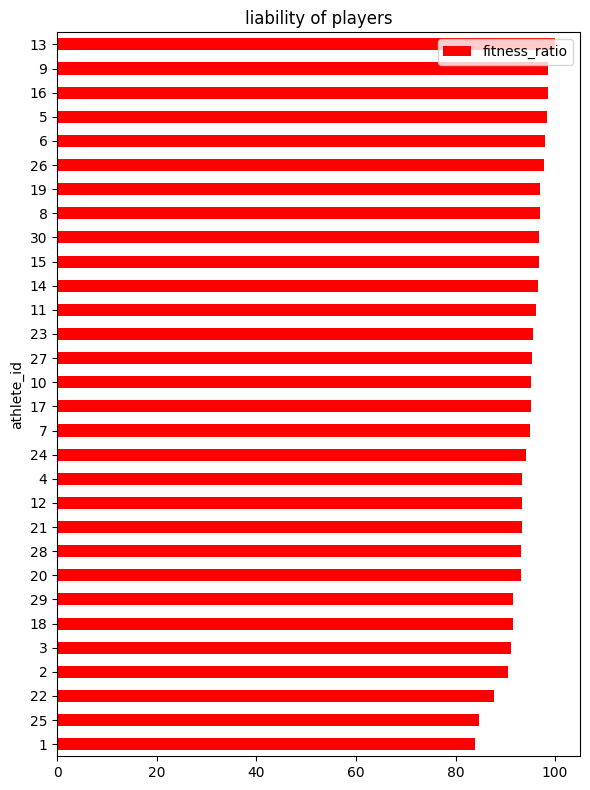

In [53]:
rcParams['figure.figsize'] = 6, 8
#player_stats.sort_values('fitness_ratio', inplace = True)
#plt.barh(fitness_players["athlete_id"], fitness_players["fitness_ratio"])
player_stats.plot(kind = 'barh',y="fitness_ratio", x="athlete_id",
                     title = "liability of players",color='r')
plt.tight_layout()
plt.show()

In [54]:
workload_df['date'] = workload_df['date'].astype('datetime64[ns]')

In [55]:
workload_df['year'] = workload_df['date'].map(lambda x: x.strftime('%Y'))
workload_df['month'] = workload_df['date'].map(lambda x: x.strftime('%m'))

In [56]:
workload_df.head()

athlete_id       date  game_workload  year month
0           1 2016-05-05            402  2016    05
1           1 2016-05-08            365  2016    05
2           1 2016-05-11            457  2016    05
3           1 2016-05-16            405  2016    05
4           1 2016-05-20            407  2016    05

In [57]:
"Number of game per month played by each player"

'Number of game per month played by each player'

C:\Users\dell\AppData\Local\Temp\ipykernel_21592\1852237730.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


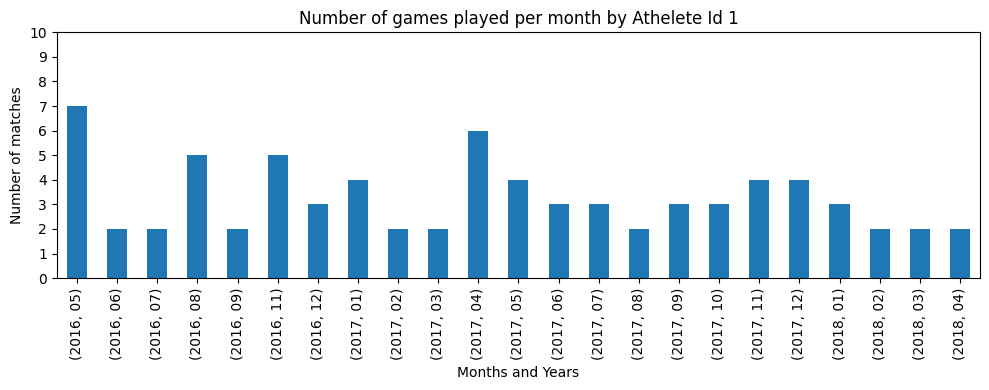

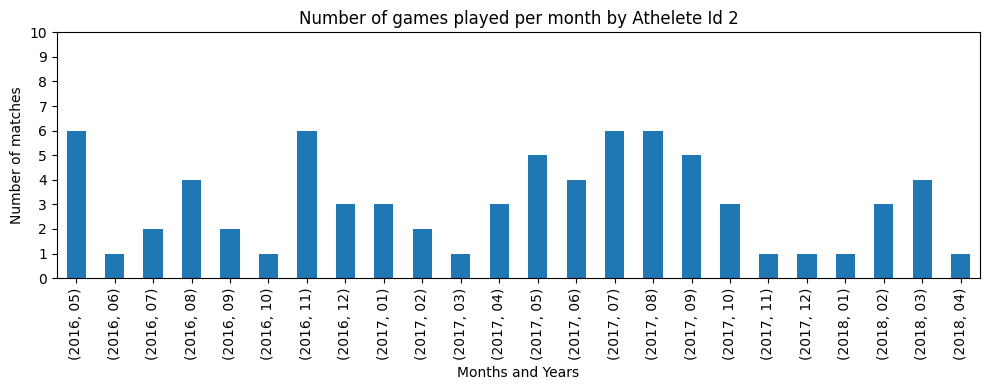

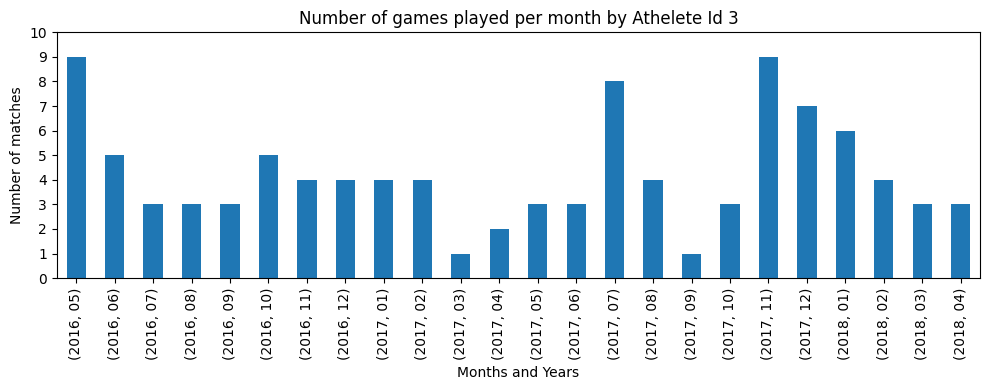

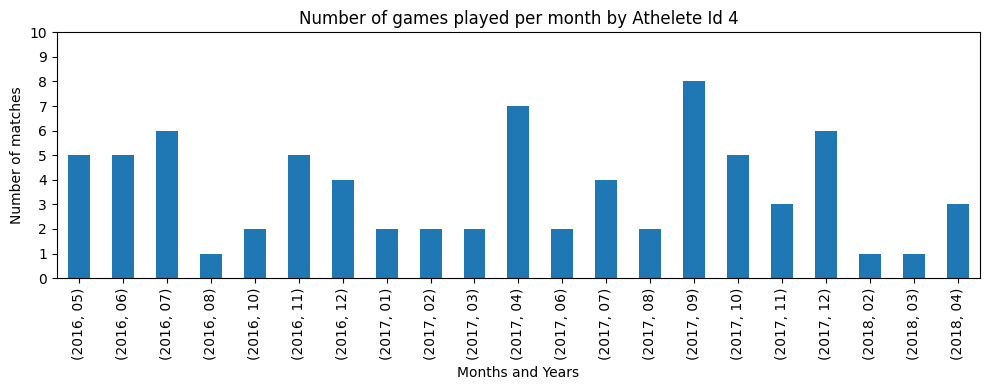

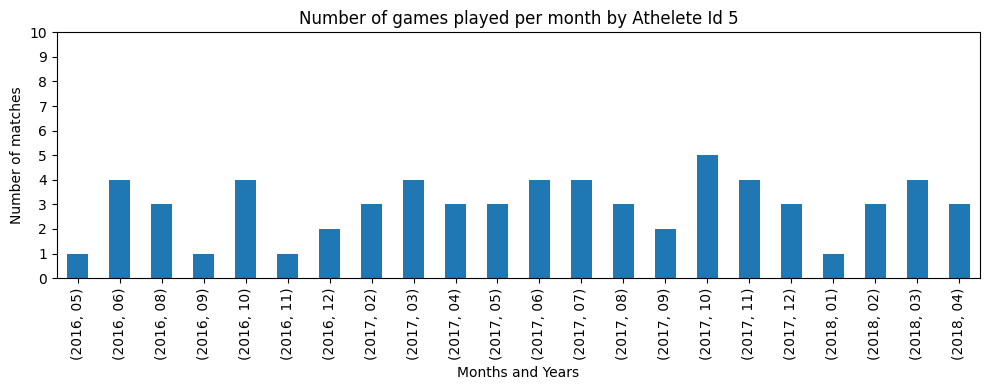

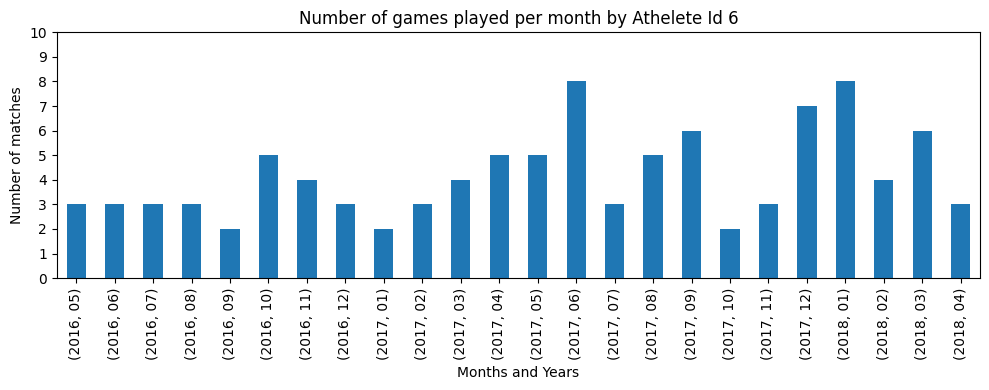

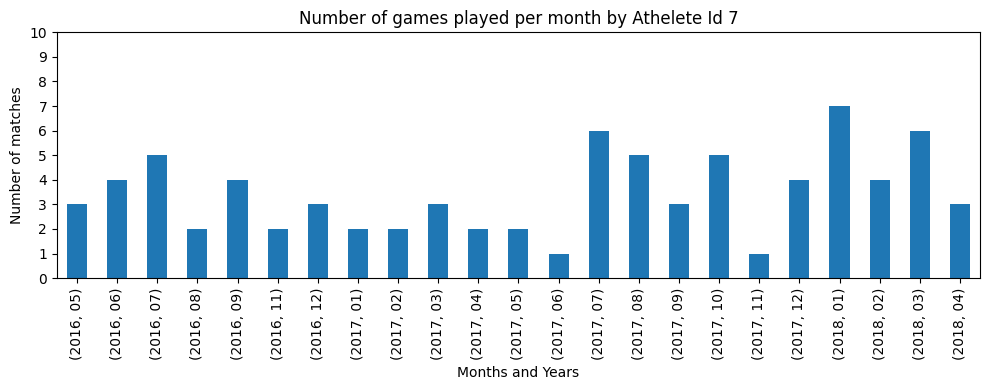

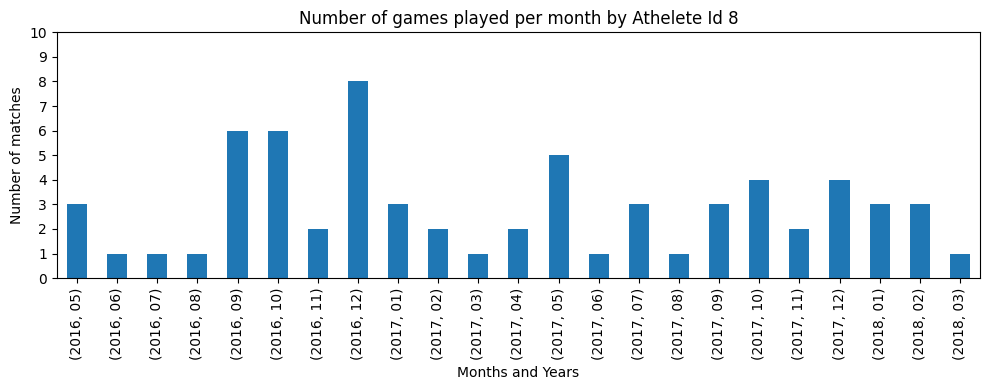

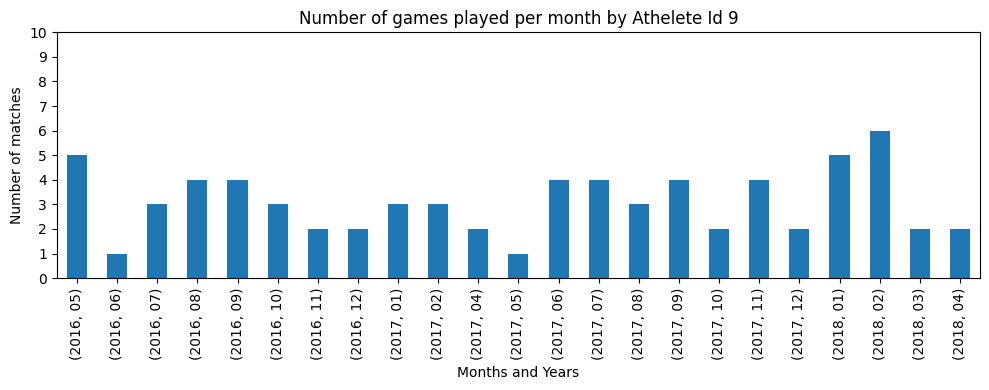

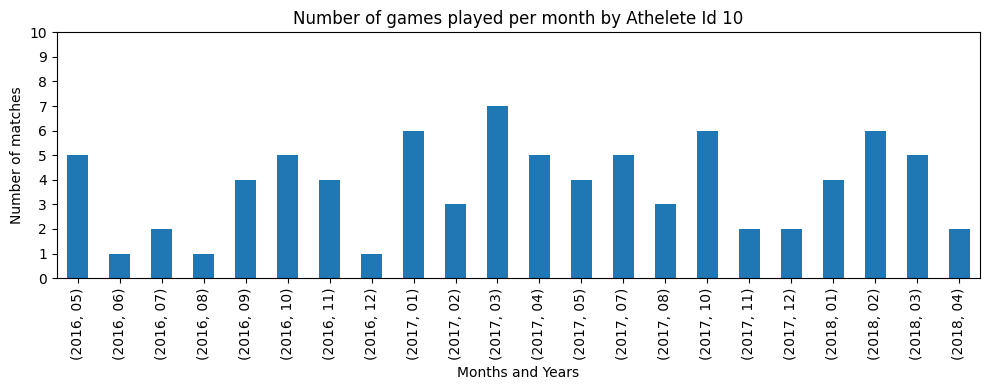

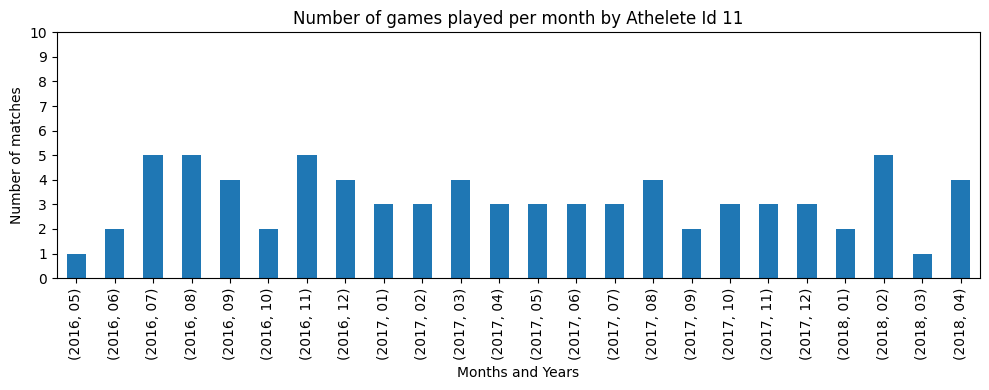

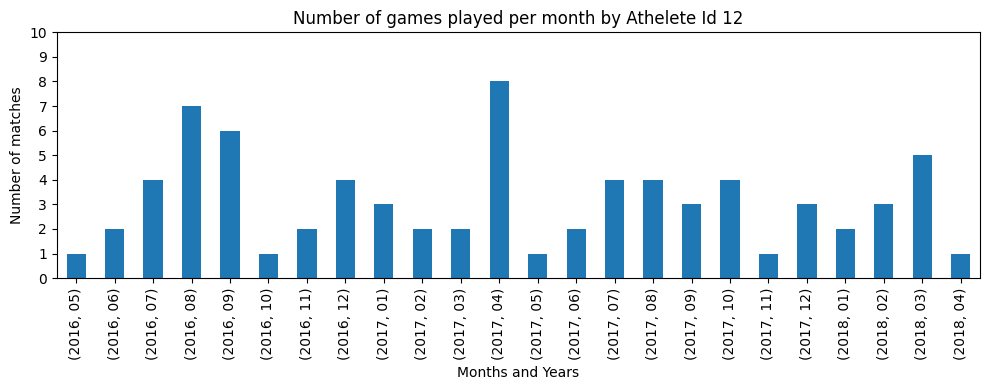

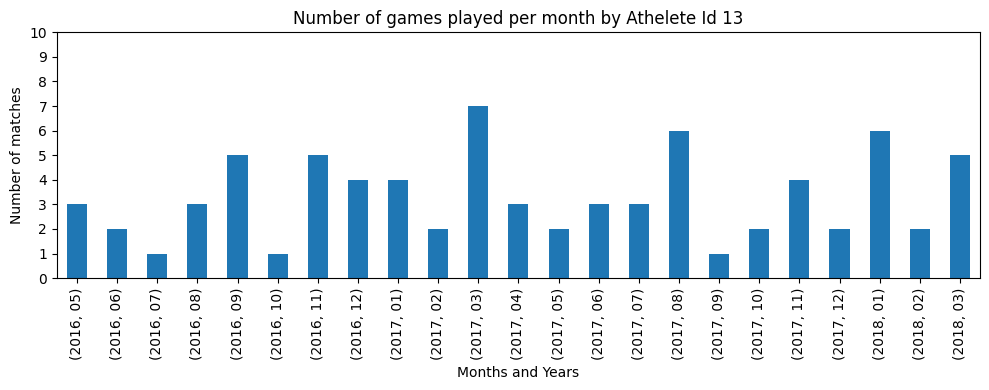

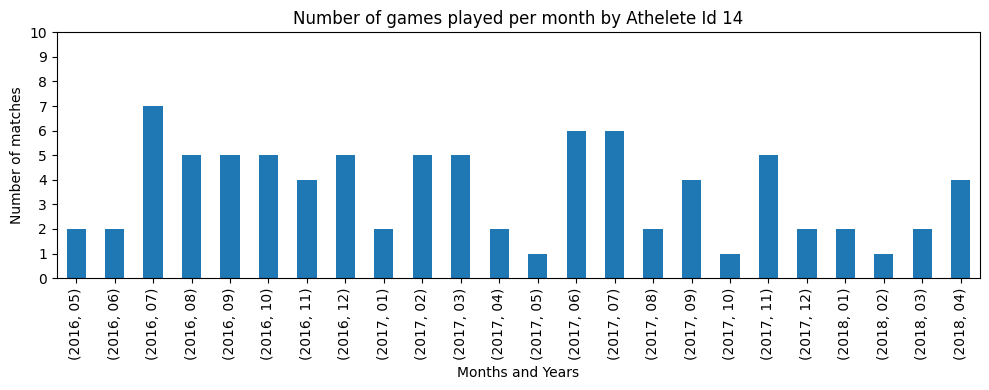

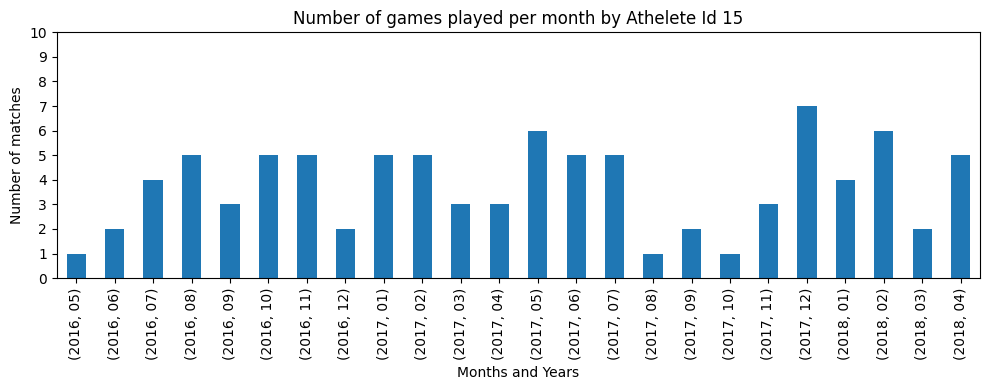

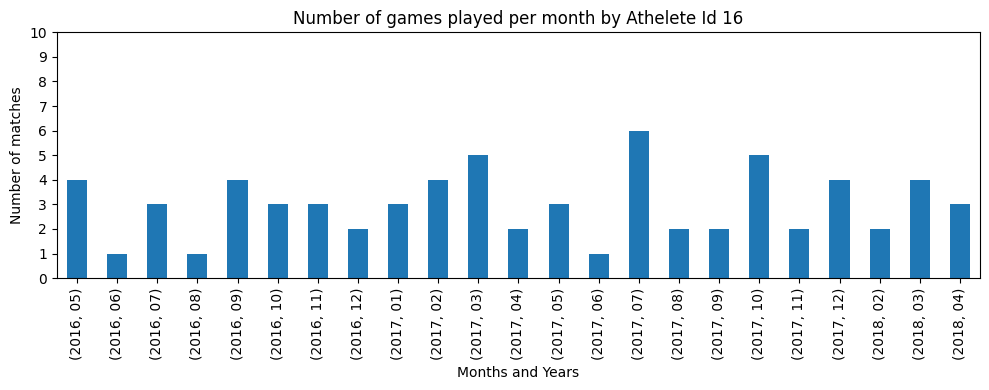

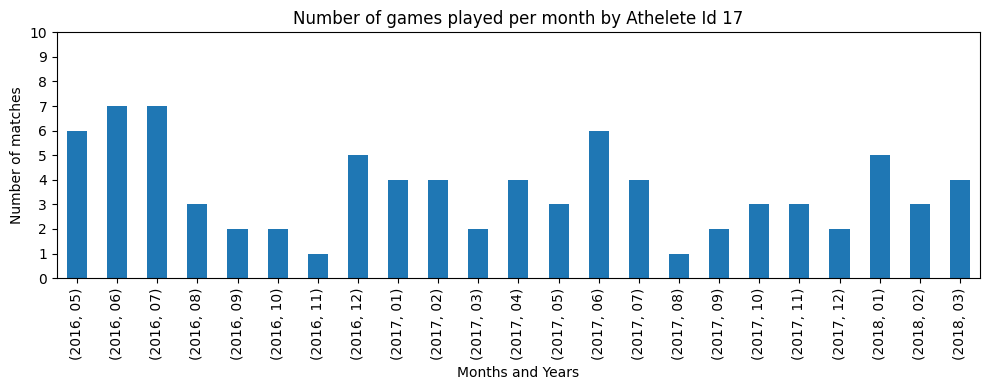

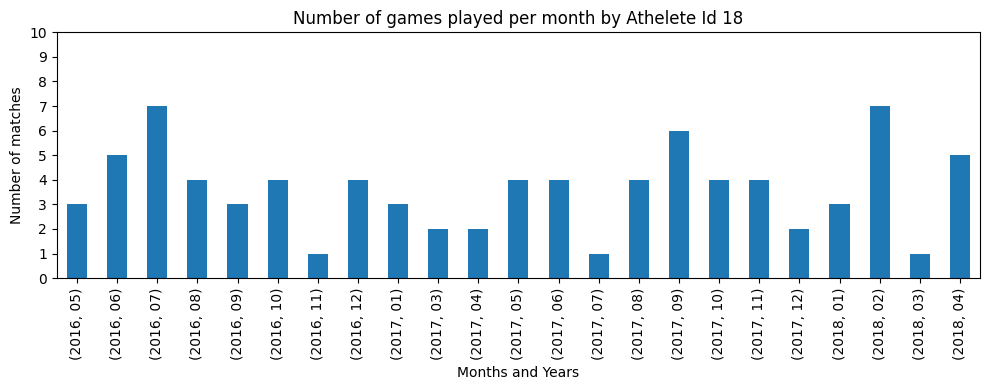

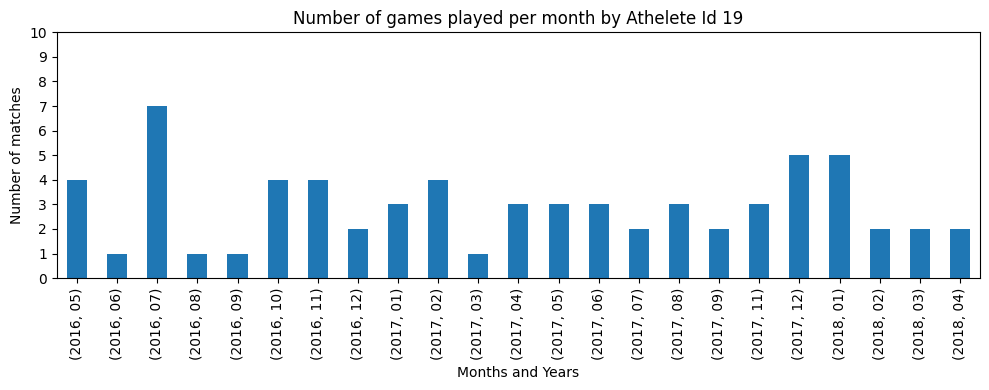

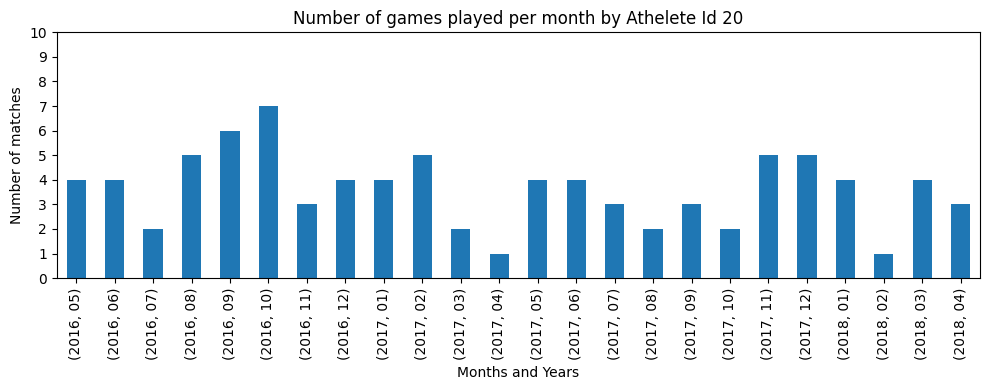

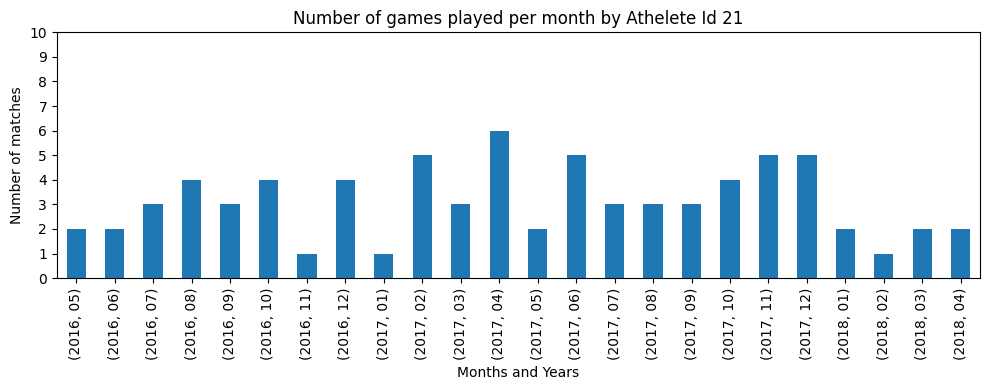

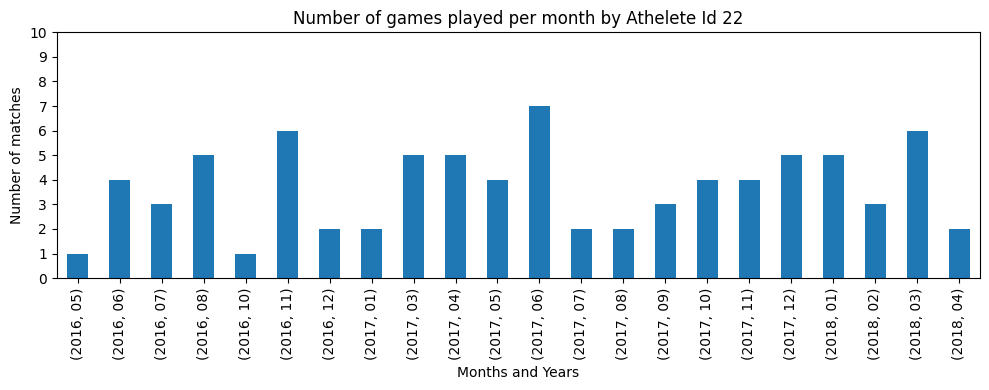

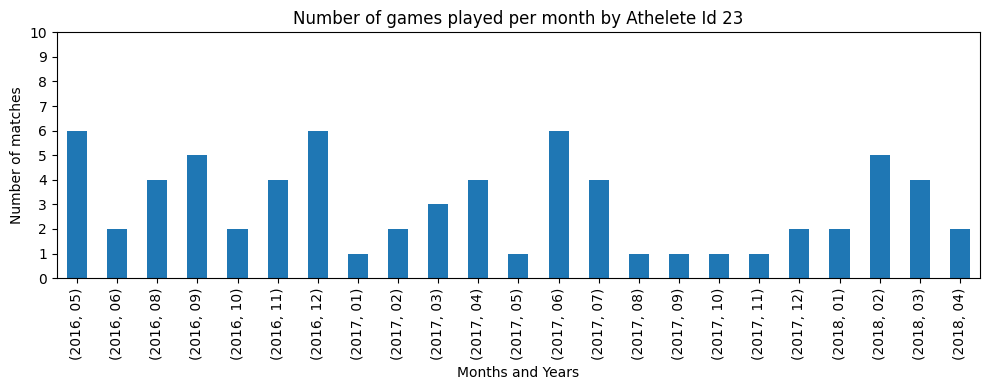

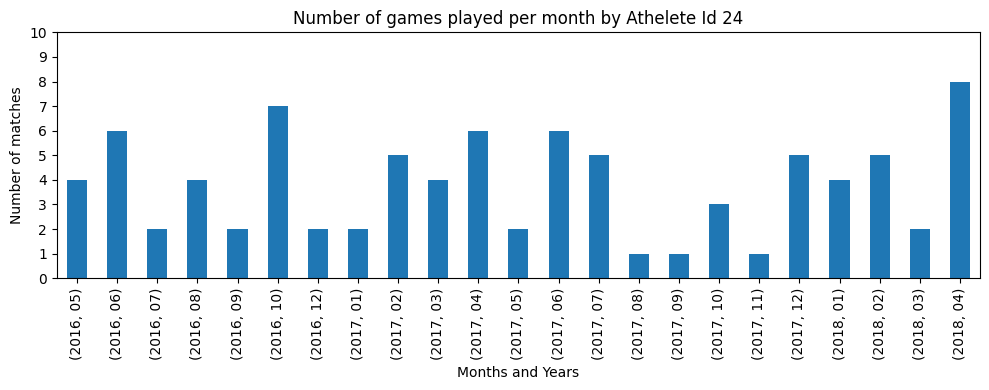

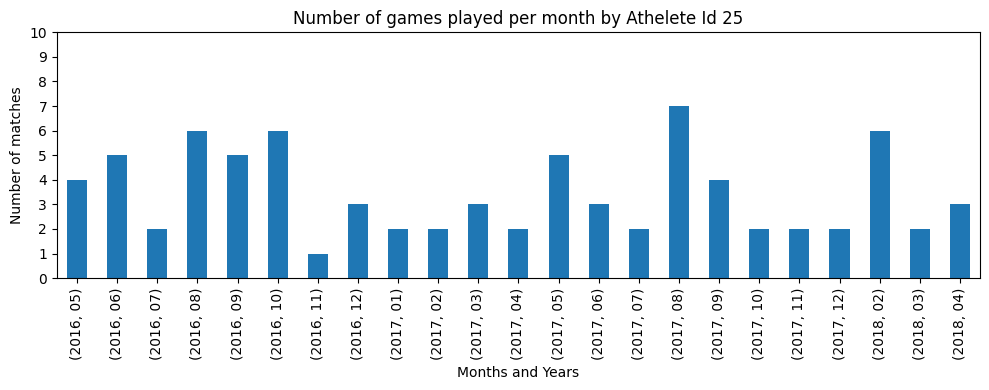

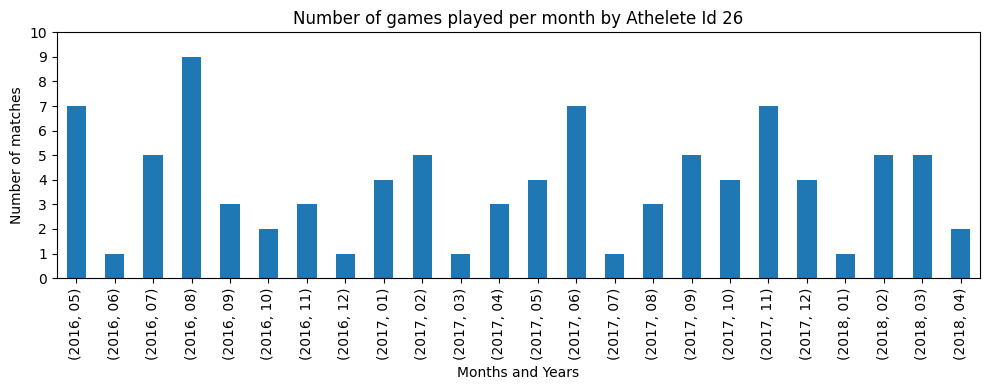

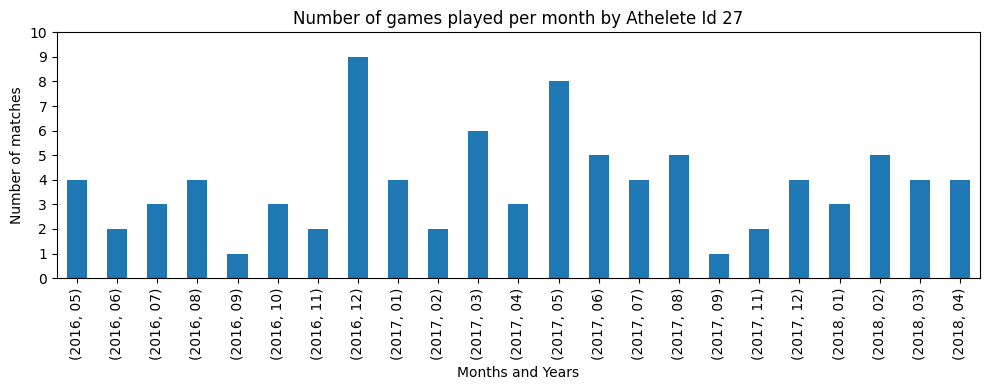

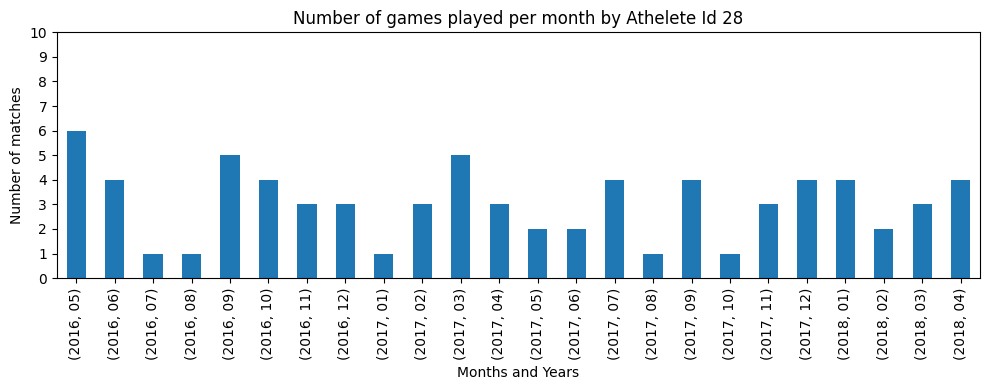

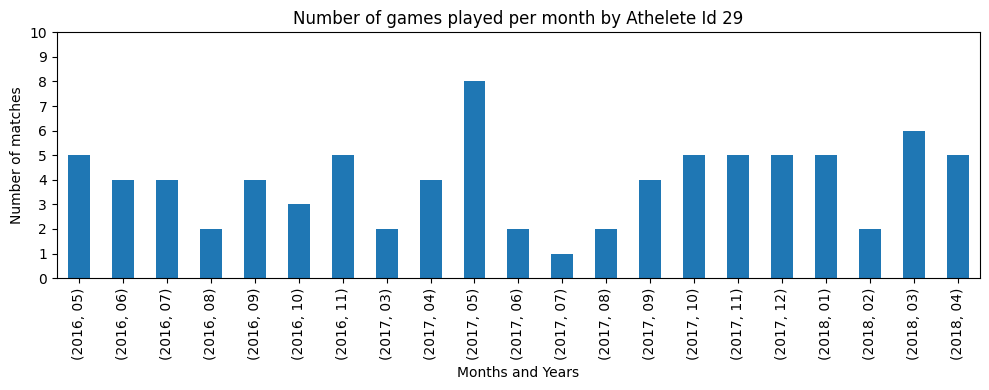

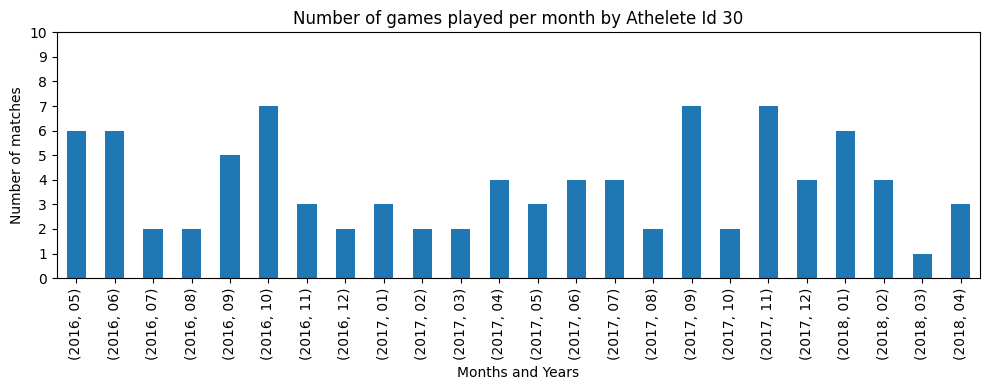

In [61]:
rcParams['figure.figsize'] = 10, 4
athletes = workload_df['athlete_id'].unique()
for athlete in range(1,31):
    fig = plt.figure()
    workload_df[workload_df.athlete_id == athlete].groupby(['year','month',])['athlete_id'].count().plot(kind="bar") 
    plt.title('Number of games played per month by Athelete Id ' + str(athlete))
    plt.yticks(np.arange(0, 11, 1))
    plt.xlabel('Months and Years')
    plt.ylabel('Number of matches')
    plt.tight_layout()  

plt.show()